<a href="https://colab.research.google.com/github/Robisonnunes/Teste_Dhauz_Ds/blob/main/Teste_tecnico_Robison_Nunes_Dhauz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - ENTENDIMENTO DO PROBLEMA DE NEGÓCIO A SER RESOLVIDO**



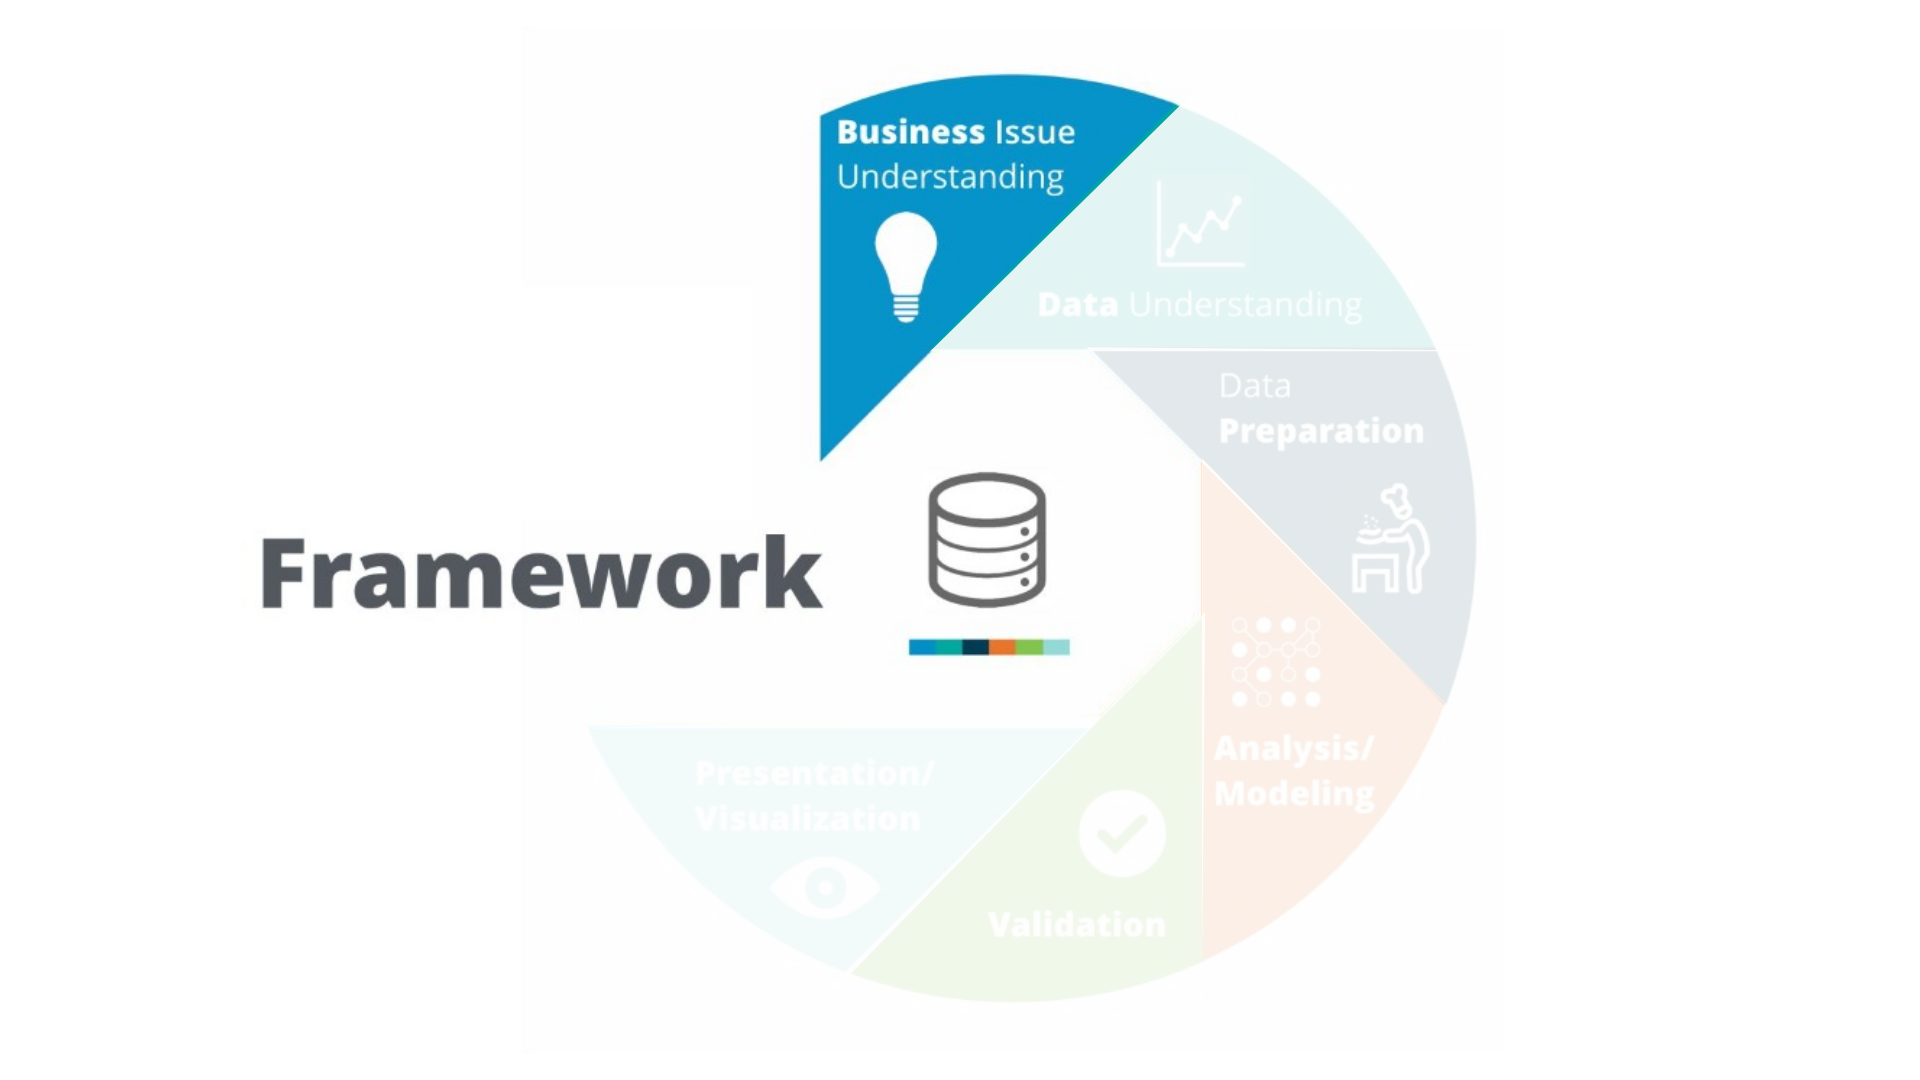

### Objetivo: 

Estudo de caso para que o candidato possa demonstrar seus conhecimentos de Ciência de Dados. A partir dos atributos apresentados é possível entender as características dos clientes, bem como a performance (inadimplência dos mesmos).  A performance dos clientes foi realizada através de backtest, seguindo a descrição de cada um dos atributos de performance. As informações confidenciais e de identificação dos clientes foram omitidas.  


### Entregáveis: 

-Storytelling: em poucos slides, preparar uma apresentação para descrever o processo de análise, etapas do estudo e resultados obtidos 

-Análise descritiva: apresentar uma análise descritiva da base 

-Árvore de decisão: aplicar a árvore de decisão para construir um algoritmo com o objetivo de reduzir a inadimplência dos clientes a serem aprovados.  


In [ ]:
# Importaçao de pacotes e libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# **2 - ENTENDIMENTO DA BASE DE DADOS**

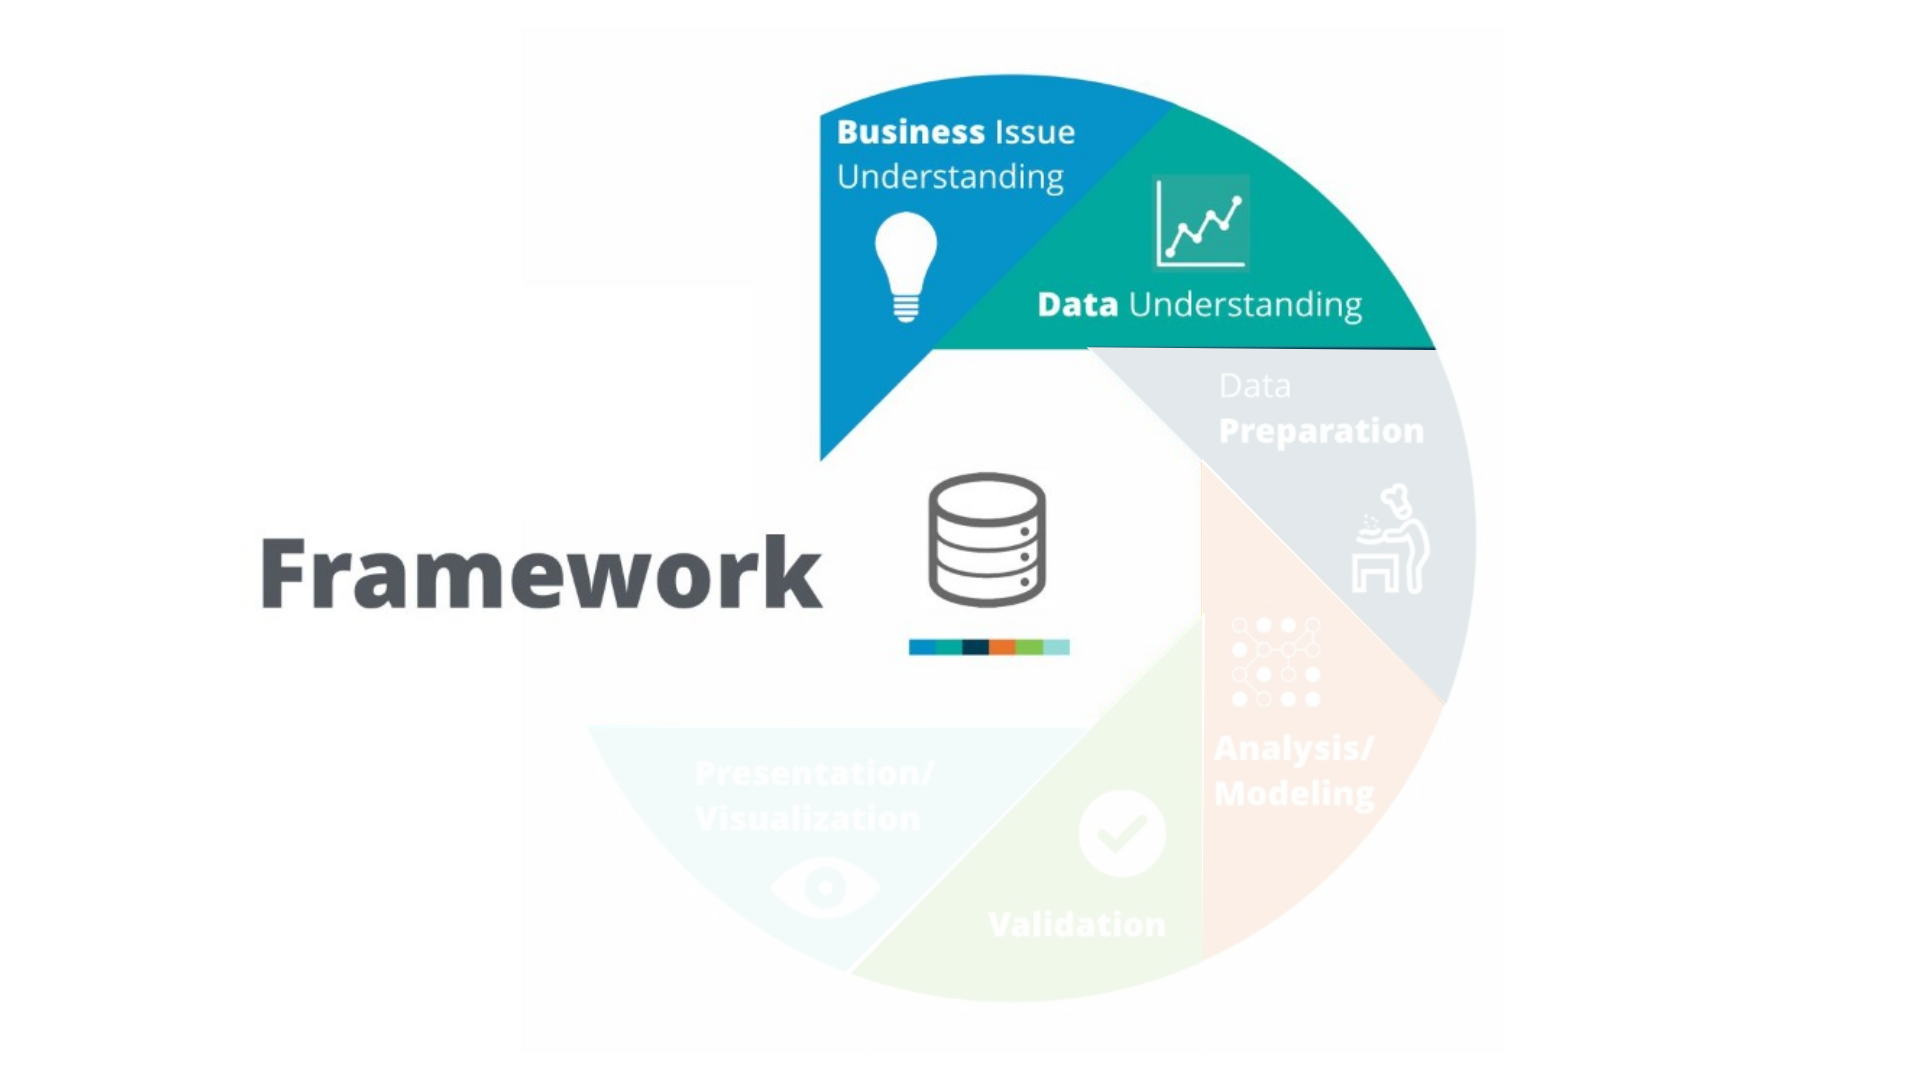

## 2.1 - ANÁLISE EXPLORATÓRIA E DESCRITIVA

In [ ]:
# Carga dos dados
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTuNuCVcXx-a9C3wd4XBDvA4Qs3VCdxRA_Ur8Q72_XkGi82Z0Oq4v6Gui8qvcJegyPsBWnIKCY_4tO6/pub?gid=1599892777&single=true&output=csv')

In [ ]:
data.head()

Nº do cliente  ... Performance 90D12M EVER
0      632585066  ...                     MAU
1     1190978461  ...                     BOM
2     1089164529  ...                     BOM
3      134232662  ...                     MAU
4     1055185956  ...                     NaN

[5 rows x 19 columns]

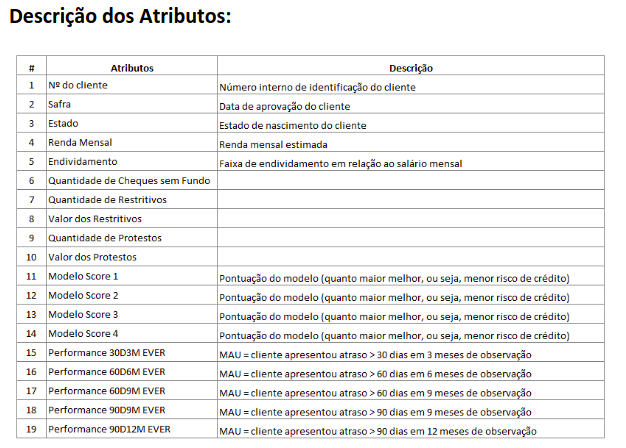

In [ ]:
# Função para mostrar as principais informações do dataset
def info(data):
  print('PRINCIPAIS INFORMAÇÕES DO DATASET', '\n')
  print('*' * 80, '\n')
  print('Shape:', data.shape, '\n')
  print('*' * 80, '\n')
  print( 'Types', '\n')
  print(data.dtypes, '\n')
  print('*' * 80, '\n')
  print('Unique Values', '\n')
  print(data.nunique(), '\n')
  print('*' * 80, '\n')
  print('% Missing Values', '\n')
  print((data.isnull().sum() /len(data))*100, '\n')



In [ ]:
info(data)

PRINCIPAIS INFORMAÇÕES DO DATASET 

******************************************************************************** 

Shape: (10000, 19) 

******************************************************************************** 

Types 

Nº do cliente                       int64
Safra                              object
Estado                             object
Renda Mensal                        int64
Endividamento                      object
Quantidade de Cheques sem Fundo     int64
Quantidade de Restritivos           int64
Valor dos Restritivos               int64
Quantidade de Protestos             int64
Valor dos Protestos                 int64
Modelo Score 1                      int64
Modelo Score 2                      int64
Modelo Score 3                      int64
Modelo Score 4                      int64
Performance 30D3M EVER             object
Performance 60D6M EVER             object
Performance 60D9M EVER             object
Performance 90D9M EVER             object
Performance 9

In [ ]:
data.columns

Index(['Nº do cliente', 'Safra', 'Estado', 'Renda Mensal', 'Endividamento',
       'Quantidade de Cheques sem Fundo', 'Quantidade de Restritivos',
       'Valor dos Restritivos', 'Quantidade de Protestos',
       'Valor dos Protestos', 'Modelo Score 1', 'Modelo Score 2',
       'Modelo Score 3', 'Modelo Score 4', 'Performance 30D3M EVER',
       'Performance 60D6M EVER', 'Performance 60D9M EVER',
       'Performance 90D9M EVER', 'Performance 90D12M EVER'],
      dtype='object')

In [ ]:
# Classificando a variáveis
var_qualitativas = ['Estado','Endividamento']
var_numericas = ['Renda Mensal','Quantidade de Cheques sem Fundo','Quantidade de Restritivos',
                 'Valor dos Restritivos', 'Quantidade de Protestos','Valor dos Protestos', 
                 'Modelo Score 1', 'Modelo Score 2','Modelo Score 3', 'Modelo Score 4']                 

### 2.1.1 - ANÁLISE UNIVARIADA - VARIÁVEIS QUALITATIVAS

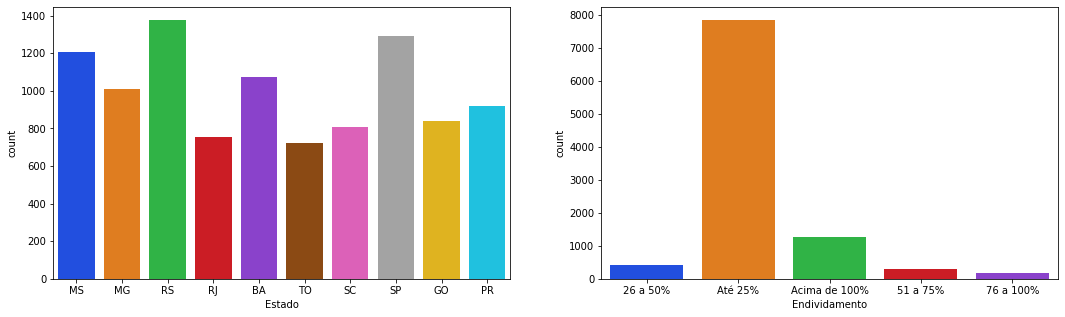

In [ ]:
# Contagem de Frequencia
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))

sns.countplot(data['Estado'], ax=ax1, palette='bright')
sns.countplot(data['Endividamento'], ax=ax2, palette='bright')

In [ ]:
data['Estado'].value_counts(normalize=True)*100

RS    13.77
SP    12.89
MS    12.09
BA    10.73
MG    10.09
PR     9.21
GO     8.41
SC     8.07
RJ     7.53
TO     7.21
Name: Estado, dtype: float64

In [ ]:
data['Endividamento'].value_counts(normalize=True)*100

Até 25%          78.50
Acima de 100%    12.57
26 a 50%          4.22
51 a 75%          2.87
76 a 100%         1.84
Name: Endividamento, dtype: float64

### 2.1.2 - ANÁLISE UNIVARIADA - VARIÁVEIS QUANTITATIVAS

In [ ]:
data[var_numericas].describe().round(2)

Renda Mensal  ...  Modelo Score 4
count      10000.00  ...        10000.00
mean        2780.16  ...          695.89
std         1464.59  ...          115.24
min         1041.00  ...            1.00
25%         1404.00  ...          630.00
50%         3365.00  ...          700.00
75%         3492.00  ...          772.00
max        33564.00  ...          999.00

[8 rows x 10 columns]

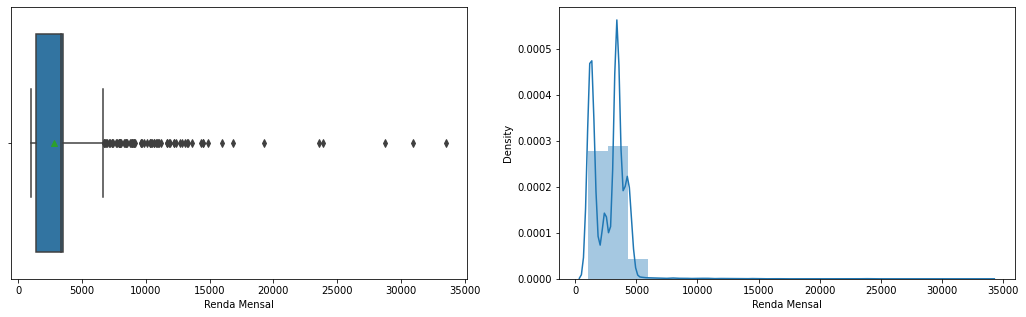

In [ ]:
# Renda Mensal
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))
sns.boxplot(data['Renda Mensal'], ax=ax1, showmeans=True)
sns.distplot(data['Renda Mensal'], bins=20, ax=ax2)


In [ ]:
# Renda Mensal por quartis
data['Renda Mensal'].quantile([.9, 1])

0.9     4279.0
1.0    33564.0
Name: Renda Mensal, dtype: float64

Análise:
Percebe-se através do bloxplot outliers, e no segundo gráfico, na distribuição dos dados percebemos que 75% dos clientes tem renda de até 3500,00, com picos de 1000,00 e 2000,00

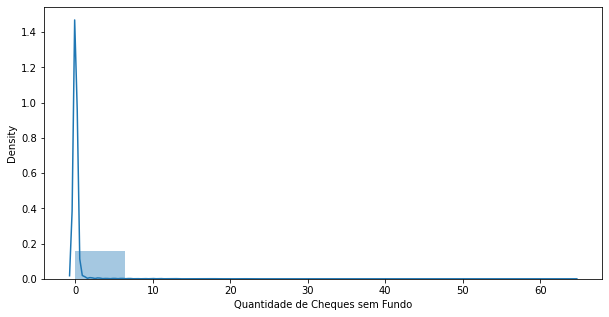

In [ ]:
# Quantidade de cheques sem fundos
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
sns.distplot(data['Quantidade de Cheques sem Fundo'], ax=ax1, bins=10)

Análise:
A maioria dos valores estão entre 0 e 7 com um pico com 96% dos clientes com 0 de cheques sem fundos.

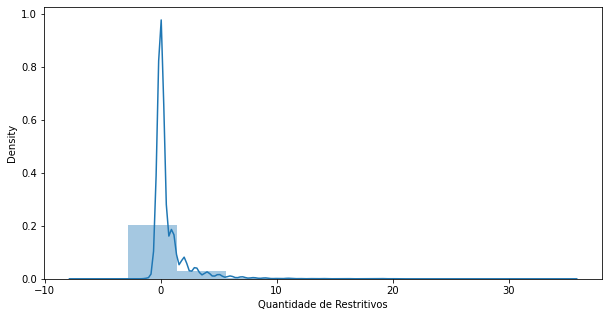

In [ ]:
# Quantidade de cheques sem fundos
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
sns.distplot(data['Quantidade de Restritivos'], ax=ax1, bins=10)

In [ ]:
data['Quantidade de Restritivos'].describe()

count    10000.000000
mean         0.711100
std          1.823285
min         -7.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         35.000000
Name: Quantidade de Restritivos, dtype: float64

In [ ]:
data['Quantidade de Restritivos'].quantile(.71)

0.0

In [ ]:
# Excluindo a linha com Quantidade de Restritivos com -7
indexname = data[data["Quantidade de Restritivos"]==-7].index
data.drop(indexname, inplace=True)
# Trocando todos os valores negativos por 0
data['Quantidade de Restritivos'].replace([-1, -2, -3, -4, -5 , -6], 0, inplace=True)

Análise: foi feita a exclusão do valor de Quantidade de Restritivos -7 porque tinha o valor do restritivo e como era só uma linha foi excluída, demais valores negativos foram substituídos por zero, mantendo as informações das outras colunas 

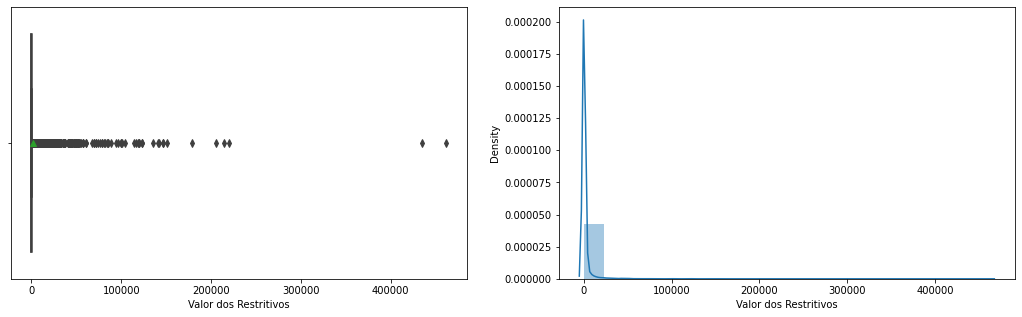

In [ ]:
# Valor dos Restritivos
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))
sns.boxplot(data['Valor dos Restritivos'], ax=ax1, showmeans=True)
sns.distplot(data['Valor dos Restritivos'], bins=20, ax=ax2)

In [ ]:
# Valor dos Restritivos por quartis
data['Valor dos Restritivos'].quantile([.9, 1])

0.9      1947.6
1.0    462266.0
Name: Valor dos Restritivos, dtype: float64

Análise: Muitos outliers, a maioria dos clientes tem 0 ou 1 restritivo, 90% dos clientes devem até 1947,60 em Restritivos

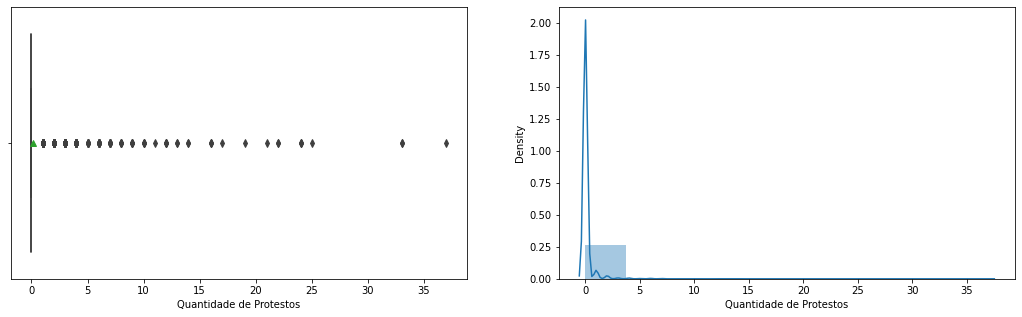

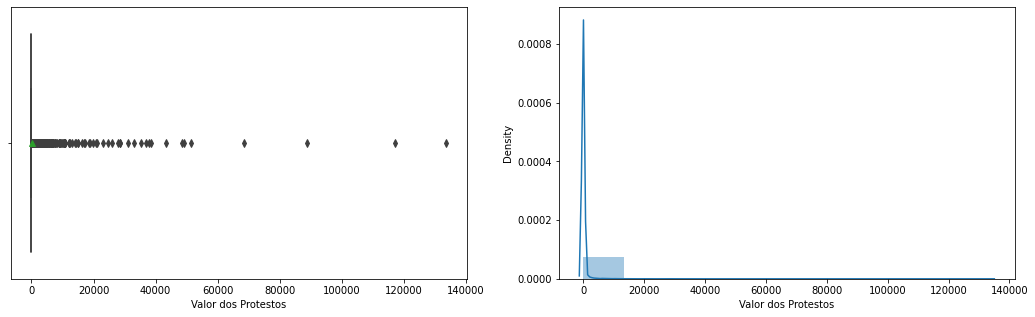

In [ ]:
# Quantidade de Protestos
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(18,5))

sns.boxplot(data['Quantidade de Protestos'], ax=ax1, showmeans=True)
sns.distplot(data['Quantidade de Protestos'], bins=10, ax=ax2)
sns.boxplot(data['Valor dos Protestos'], ax=ax3, showmeans=True)
sns.distplot(data['Valor dos Protestos'], bins=10, ax=ax4)



In [ ]:
# Valor dos Protestos por quartis
data['Valor dos Protestos'].quantile([.99, 1])

0.99      3604.36
1.00    133742.00
Name: Valor dos Protestos, dtype: float64

Análise: Tanto as quantidades e valores de protestos seguem a mesma relação com a grande maioria com 0 ou 1 protesto, sendo que 99% dos clientes tem protestos com valor de até 3604,36 


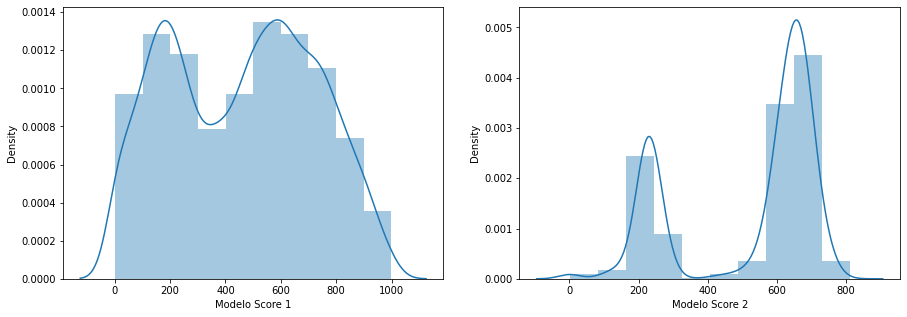

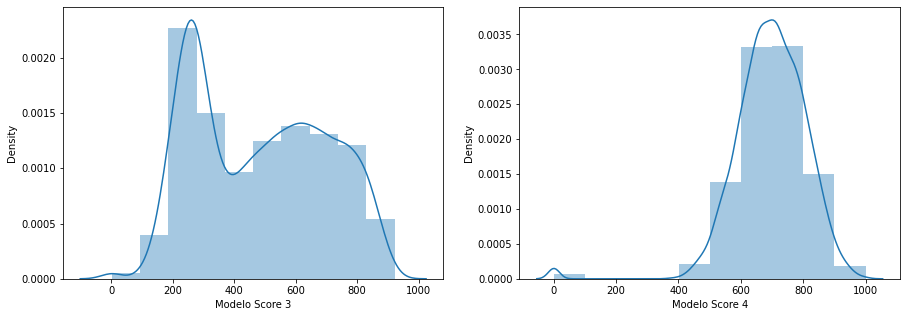

In [ ]:
# Scores

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(15,5))

sns.distplot(data['Modelo Score 1'], bins=10, ax=ax1)
sns.distplot(data['Modelo Score 2'], bins=10, ax=ax2)
sns.distplot(data['Modelo Score 3'], bins=10, ax=ax3)
sns.distplot(data['Modelo Score 4'], bins=10, ax=ax4)

Análise:


1.   O modelo Score 1 tem duas modas com um pico de 100 a 200 pontos e outro de 500 a 600 pontos, com dados distantes em relação a média
2.   O modelo Score 2 tem duas modas com um pico de 200 pontos e outro de 700 pontos, distanciando bastante da média
3.   O modelo Score 3 tem um pico de 250 a 300 pontos e demais dados distribuidos nas frequencias de pontos restantes.
4.   O modelo Score 4 tem  pico entre 600 a 800 sendo este o que classifica melhor os clientes, comportando-se como uma distribuição normal.


## 2.1.3 - ANÁLISE BIVARIADA - VARIÁVEIS QUALITATIVAS

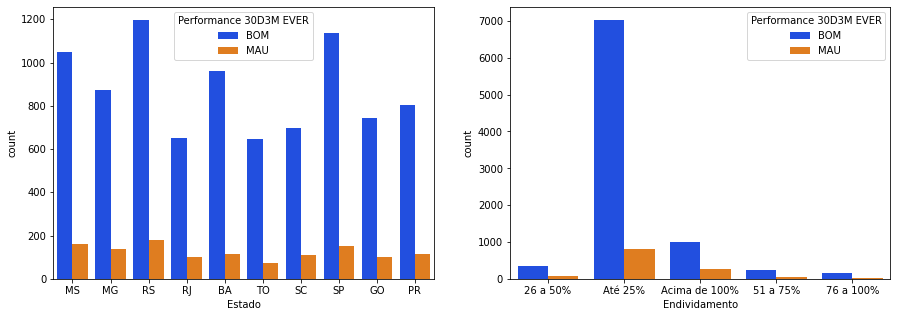

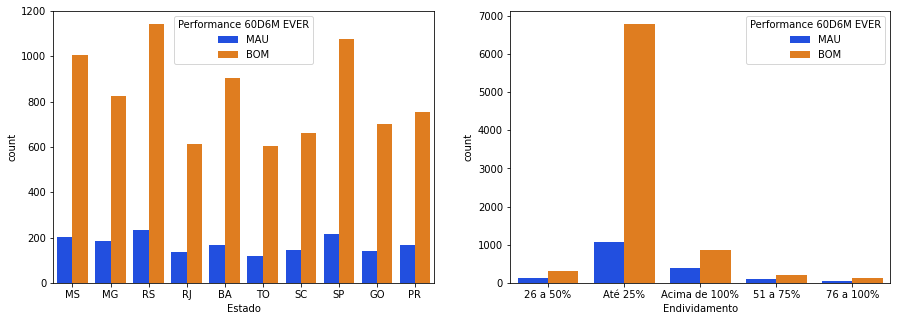

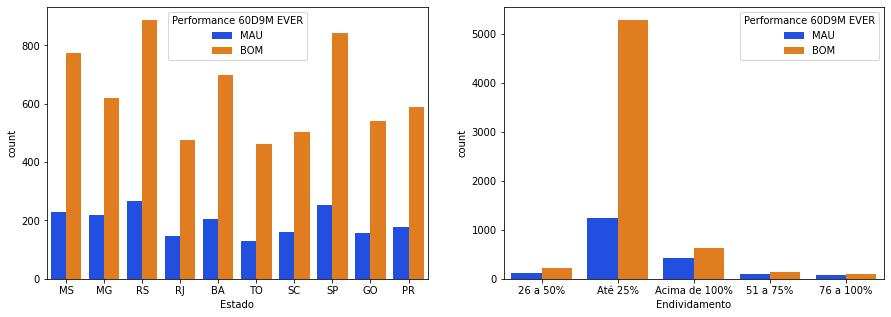

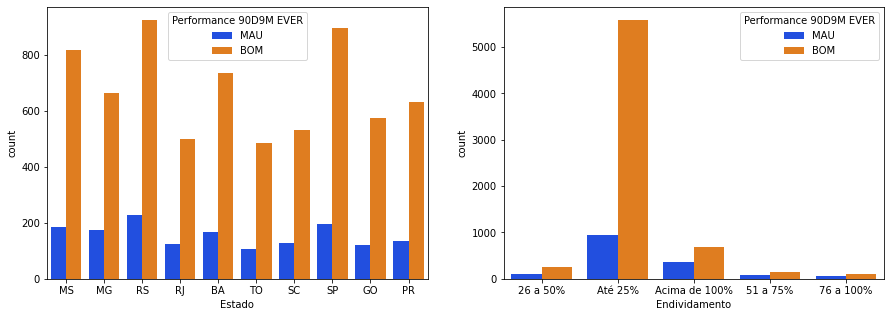

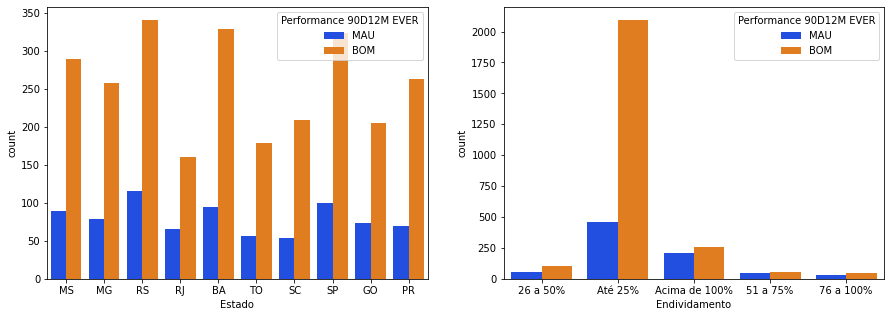

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(15,5))
fig, (ax5, ax6) = plt.subplots(1,2,figsize=(15,5))
fig, (ax7, ax8) = plt.subplots(1,2,figsize=(15,5))
fig, (ax9, ax10) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data['Estado'], ax=ax1, hue=data['Performance 30D3M EVER'],palette='bright')
sns.countplot(data['Endividamento'], ax=ax2, hue=data['Performance 30D3M EVER'], palette='bright')
sns.countplot(data['Estado'], ax=ax3, hue=data['Performance 60D6M EVER'],palette='bright')
sns.countplot(data['Endividamento'], ax=ax4, hue=data['Performance 60D6M EVER'], palette='bright')
sns.countplot(data['Estado'], ax=ax5, hue=data['Performance 60D9M EVER'],palette='bright')
sns.countplot(data['Endividamento'], ax=ax6, hue=data['Performance 60D9M EVER'], palette='bright')
sns.countplot(data['Estado'], ax=ax7, hue=data['Performance 90D9M EVER'],palette='bright')
sns.countplot(data['Endividamento'], ax=ax8, hue=data['Performance 90D9M EVER'], palette='bright')
sns.countplot(data['Estado'], ax=ax9, hue=data['Performance 90D12M EVER'],palette='bright')
sns.countplot(data['Endividamento'], ax=ax10, hue=data['Performance 90D12M EVER'], palette='bright')

Análise: 

1.   Comportamento do estados sob a ótica das variáveis target bastante parecido pela sua proporçao de participação na base total de clientes
2.   Em relação ao nível de endividamento frente as variáveis target a faixa de até 25% é a que mais categoriza como BOM, demais seguem comportamentos parecidos, destaque para a faixa de > 100% que categoriza com BOM a maioria dos clientes, seria válido fazer um cross com a taxa de Default dessa categoria de clientes para ver o impacto.



## 2.1.4 - ANÁLISE BIVARIADA - VARIÁVEIS QUANTITATIVAS

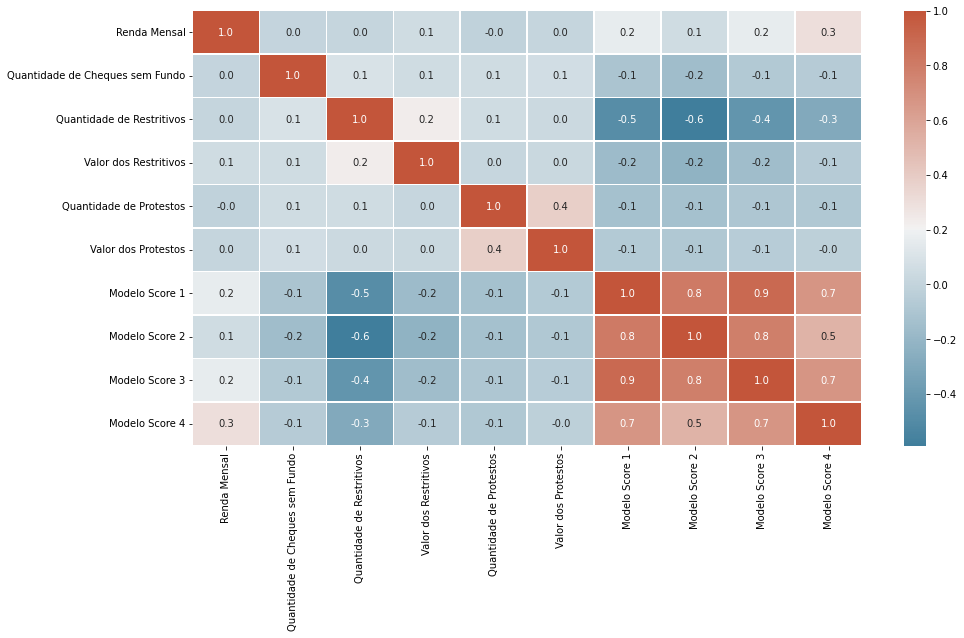

In [ ]:
# Matriz de Correlação

fig = plt.subplots(figsize=(15,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
correlation = data[var_numericas].corr()
corrplot = sns.heatmap(correlation,cmap=cmap,annot=True, fmt='.1f', linewidths=.6)


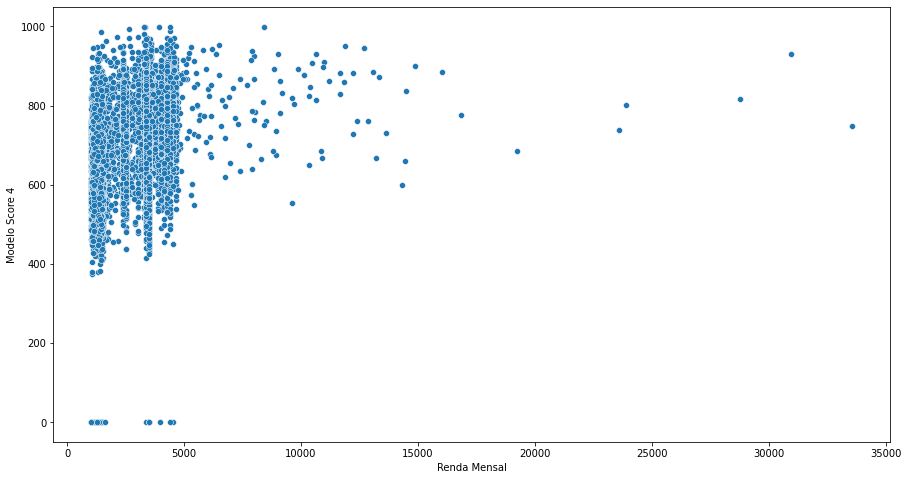

In [ ]:
# Scatterplot Renda Mensal x Modelo Score4 pela visão da Variável Target
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data['Renda Mensal'], y=data['Modelo Score 4'],
                data=data , ax=ax)
            

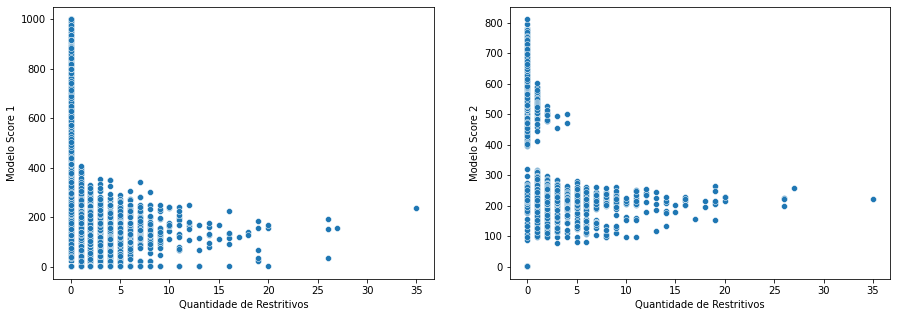

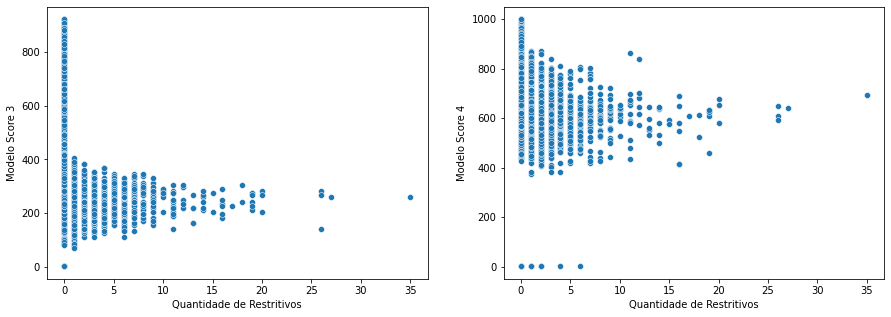

In [ ]:
# Scatterplot Renda Mensal x Modelo Score 1,2,3,4  pela visão da Variável Target
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig, (ax3, ax4) = plt.subplots(1,2,figsize=(15,5))

sns.scatterplot(x=data['Quantidade de Restritivos'], y=data['Modelo Score 1'],
                data=data , ax=ax1)
sns.scatterplot(x=data['Quantidade de Restritivos'], y=data['Modelo Score 2'],
                data=data , ax=ax2)
sns.scatterplot(x=data['Quantidade de Restritivos'], y=data['Modelo Score 3'],
                data=data , ax=ax3)
sns.scatterplot(x=data['Quantidade de Restritivos'], y=data['Modelo Score 4'],
                data=data , ax=ax4)
            

Análise:


1.   Existe uma correlção positiva de 0.3 entre Renda Mensal x Modelo Score 4, a Medida que a Renda Mensal do cliente cresce a pontual do Modelo Score 4 tende a ser maior
2.   Existe uma correlção negativa de 0.5, 0.6, 0,4, 0.3 respectivamente entre Quantidade de Restritivos x Modelo Score 1,2,3, 4, a Medida que a Quantidade de Restritivos é maior a pontuação dos Modelos 1,2,3,4 tende a diminuir.



## 2.1.5 - RELATÓRIO DA ANÁLISE EXPLORATÓRIA E DESCRITIVA

Perfil do Cliente:

*   A maioria dos clientes estão concentrados nos estados de RS/SP/MS
*   78% da base de clientes tem um nível de endividamento de até 25%
*   A renda mensal média é de 2780,16, sendo que 90% da base tem renda de até 4279,00
*   96 % da base não possuem cheque sem fundos
*   71 % da base não possuem restritivos, sendo do que possuem 90% é de até 1947,60
*   75 % da base não possuem prostestos , sendo do que possuem 99% é de até 3604,36
*   A média de pontuação da base nos modelos de Score é de 540,63, sendo que o Modelo Score 4, é o que avalia melhor os clientes.






# **3 - PREPARAÇAO DA BASE DE DADOS**

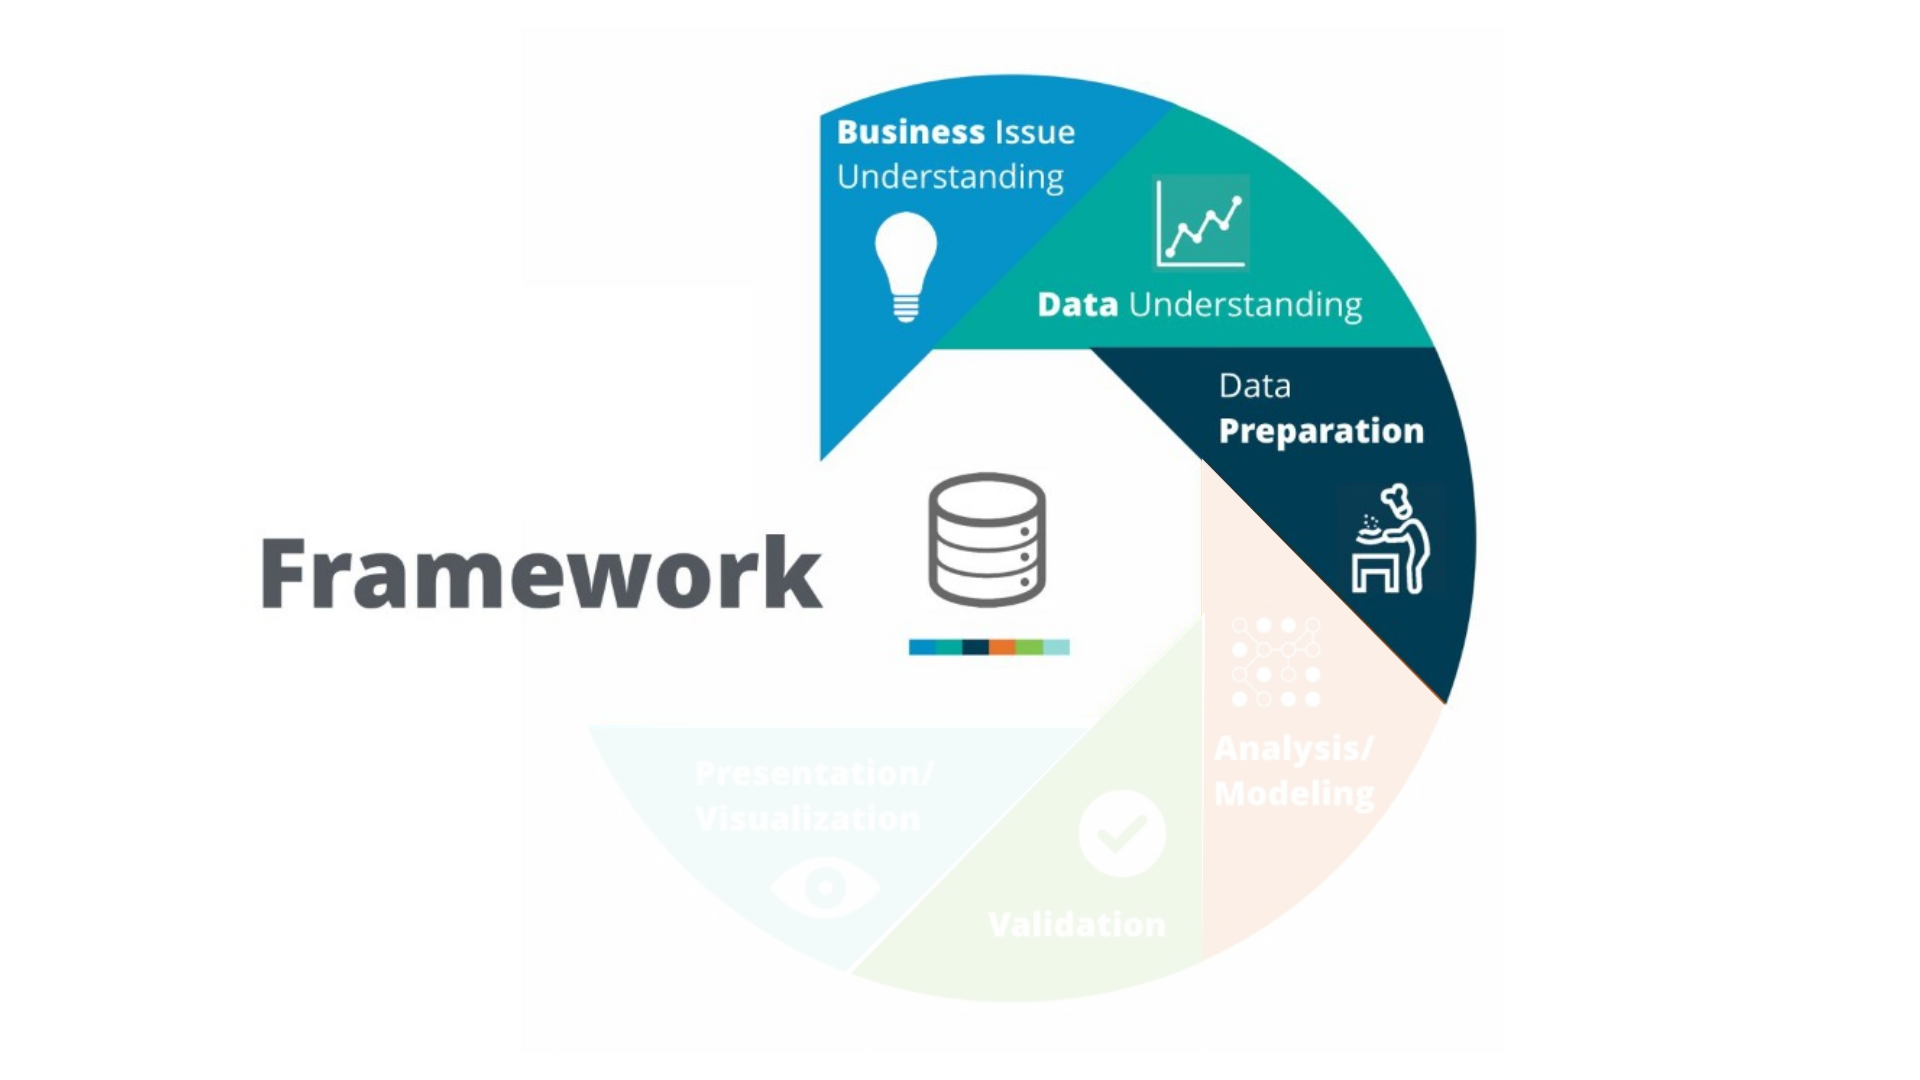

## 3.1 - LIMPEZA E TRANSFORMAÇÃO DOS DADOS

In [ ]:
#Review dos dados
info(data)

PRINCIPAIS INFORMAÇÕES DO DATASET 

******************************************************************************** 

Shape: (9999, 19) 

******************************************************************************** 

Types 

Nº do cliente                       int64
Safra                              object
Estado                             object
Renda Mensal                        int64
Endividamento                      object
Quantidade de Cheques sem Fundo     int64
Quantidade de Restritivos           int64
Valor dos Restritivos               int64
Quantidade de Protestos             int64
Valor dos Protestos                 int64
Modelo Score 1                      int64
Modelo Score 2                      int64
Modelo Score 3                      int64
Modelo Score 4                      int64
Performance 30D3M EVER             object
Performance 60D6M EVER             object
Performance 60D9M EVER             object
Performance 90D9M EVER             object
Performance 90

In [ ]:
data.describe().round(2)

Nº do cliente  Renda Mensal  ...  Modelo Score 3  Modelo Score 4
count   9.999000e+03       9999.00  ...         9999.00         9999.00
mean    6.100837e+08       2780.09  ...          483.30          695.90
std     3.515896e+08       1464.65  ...          215.56          115.24
min     1.241258e+06       1041.00  ...            1.00            1.00
25%     3.056479e+08       1404.00  ...          277.00          630.00
50%     6.100545e+08       3365.00  ...          482.00          700.00
75%     9.144611e+08       3492.00  ...          669.00          772.00
max     1.218989e+09      33564.00  ...          922.00          999.00

[8 rows x 11 columns]

In [ ]:
# Exlcuindo as variáveis não relevantes para o modelo
    # Nº do Cliente : possue registros únicos
    # Safra: possuem uma representividade baixa (6 valores únicos) 

drop = ['Nº do cliente', 'Safra']
data = data.drop(labels=drop, axis=1)

In [ ]:
# Criação de 5 datasets, um para cada variável target

data_30D3M = data.drop(['Performance 60D6M EVER', 'Performance 60D9M EVER',
       'Performance 90D9M EVER', 'Performance 90D12M EVER'], axis=1)
data_60D6M = data.drop(['Performance 30D3M EVER', 'Performance 60D9M EVER',
       'Performance 90D9M EVER', 'Performance 90D12M EVER'], axis=1)
data_60D9M = data.drop(['Performance 30D3M EVER', 'Performance 60D6M EVER',
       'Performance 90D9M EVER', 'Performance 90D12M EVER'], axis=1)
data_90D9M = data.drop(['Performance 30D3M EVER', 'Performance 60D6M EVER',
       'Performance 60D9M EVER', 'Performance 90D12M EVER'], axis=1)
data_90D12M = data.drop(['Performance 30D3M EVER', 'Performance 60D6M EVER',
       'Performance 60D9M EVER', 'Performance 90D9M EVER'], axis=1)

# Excluido as linhas fantantes nas variáveís alvo
data_60D9M.dropna(subset=['Performance 60D9M EVER'], inplace=True)
data_90D9M.dropna(subset=['Performance 90D9M EVER'], inplace=True)
data_90D12M.dropna(subset=['Performance 90D12M EVER'], inplace=True)

# Tornando as variávies alvo em valores binários
data_30D3M['Performance 30D3M EVER']= data_30D3M['Performance 30D3M EVER'].map({'BOM':0 ,'MAU':1}).astype('int64')
data_60D6M['Performance 60D6M EVER']= data_60D6M['Performance 60D6M EVER'].map({'BOM':0 ,'MAU':1}).astype('int64')
data_60D9M['Performance 60D9M EVER']= data_60D9M['Performance 60D9M EVER'].map({'BOM':0 ,'MAU':1}).astype('int64')
data_90D9M['Performance 90D9M EVER']= data_90D9M['Performance 90D9M EVER'].map({'BOM':0 ,'MAU':1}).astype('int64')
data_90D12M['Performance 90D12M EVER']= data_90D12M['Performance 90D12M EVER'].map({'BOM':0 ,'MAU':1}).astype('int64')

data_30D3M.rename(columns={'Performance 30D3M EVER': 'Default'}, inplace=True)
data_60D6M.rename(columns={'Performance 60D6M EVER': 'Default'}, inplace=True)
data_60D9M.rename(columns={'Performance 60D9M EVER': 'Default'}, inplace=True)
data_90D9M.rename(columns={'Performance 90D9M EVER': 'Default'}, inplace=True)
data_90D12M.rename(columns={'Performance 90D12M EVER':'Default'}, inplace=True)

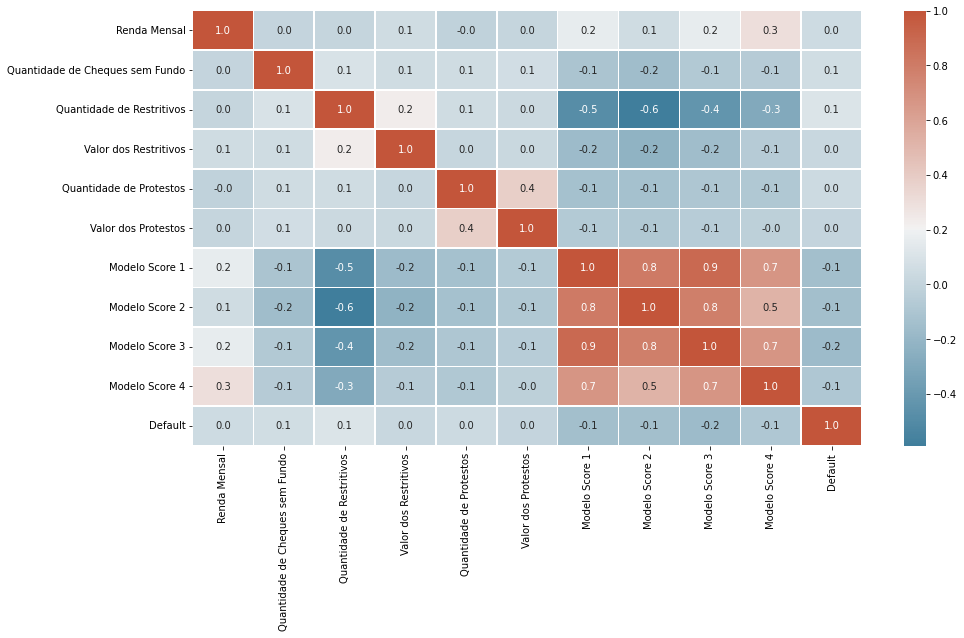

In [ ]:
# Matriz de Correlação pela variável target
var_numericas2 = ['Renda Mensal',
 'Quantidade de Cheques sem Fundo',
 'Quantidade de Restritivos',
 'Valor dos Restritivos',
 'Quantidade de Protestos',
 'Valor dos Protestos',
 'Modelo Score 1',
 'Modelo Score 2',
 'Modelo Score 3',
 'Modelo Score 4',
 'Default']

fig = plt.subplots(figsize=(15,8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
correlation = data_30D3M[var_numericas2].corr()
corrplot = sns.heatmap(correlation,cmap=cmap,annot=True, fmt='.1f', linewidths=.6)

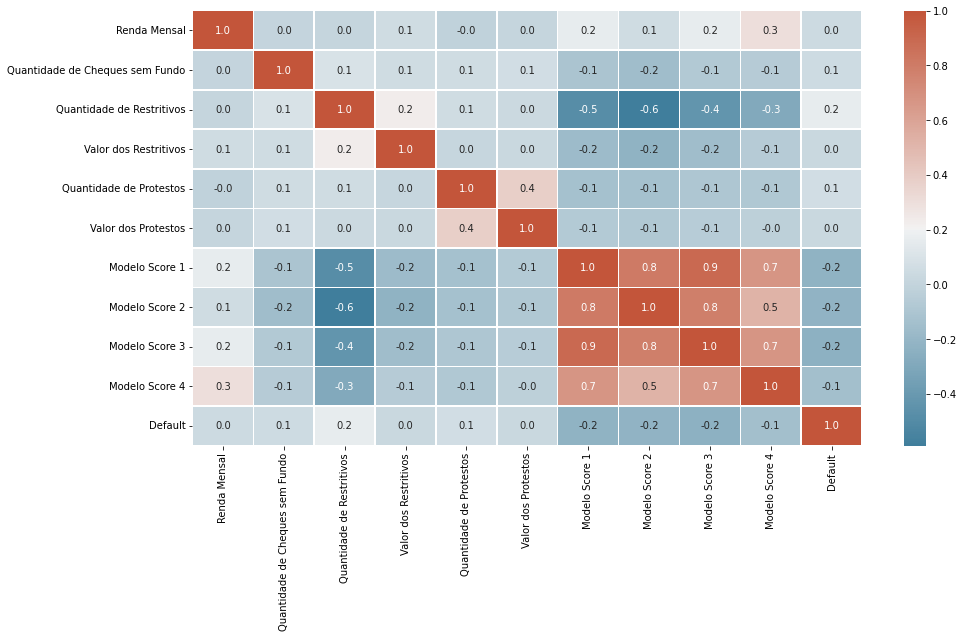

In [ ]:
# Matriz de Correlação pela variável target
fig = plt.subplots(figsize=(15,8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
correlation = data_60D6M[var_numericas2].corr()
corrplot = sns.heatmap(correlation,cmap=cmap,annot=True, fmt='.1f', linewidths=.6)

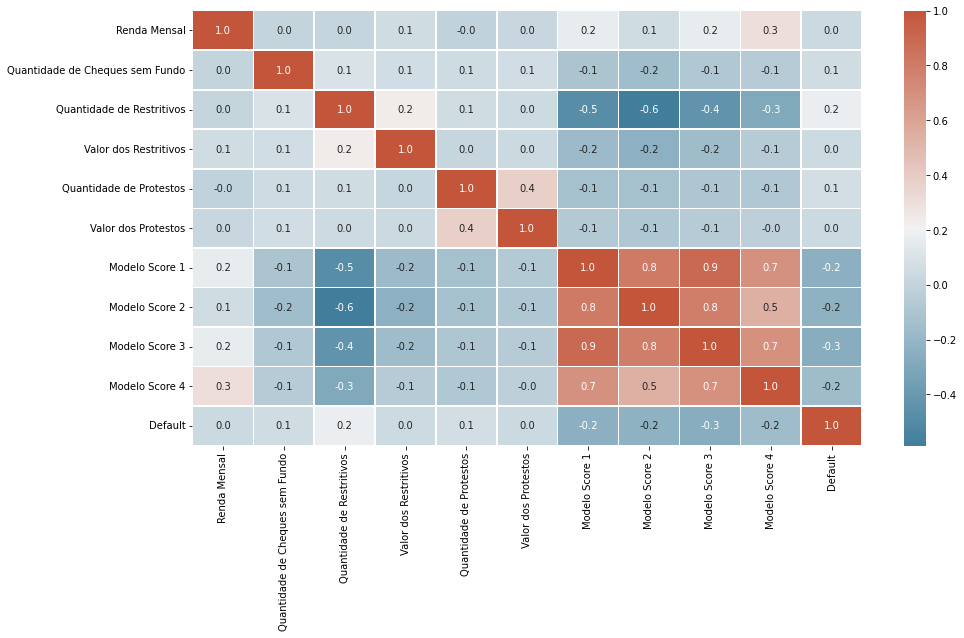

In [ ]:
# Matriz de Correlação pela variável target

fig = plt.subplots(figsize=(15,8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
correlation = data_60D9M[var_numericas2].corr()
corrplot = sns.heatmap(correlation,cmap=cmap,annot=True, fmt='.1f', linewidths=.6)

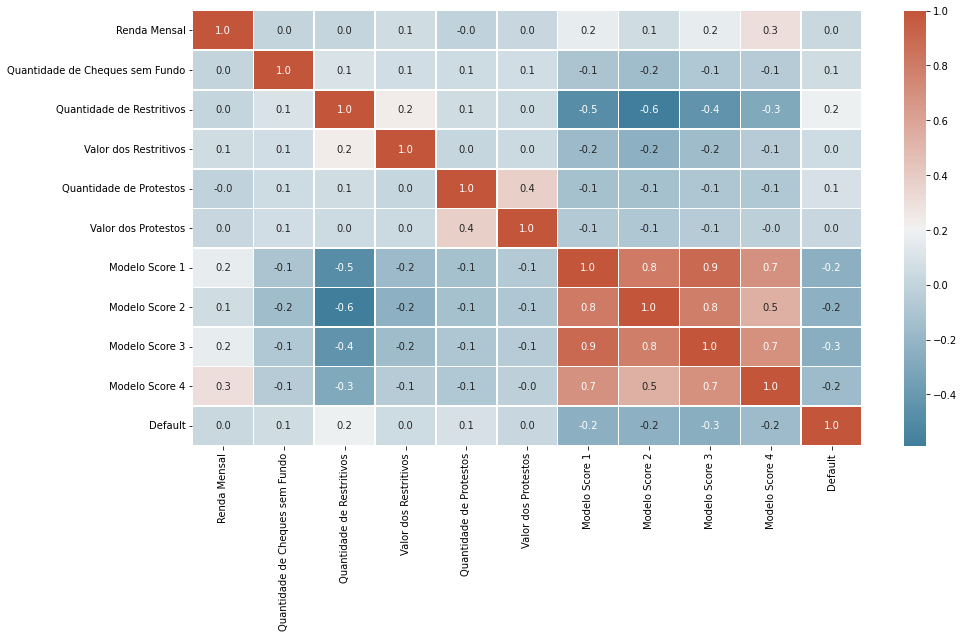

In [ ]:
# Matriz de Correlação pela variável target

fig = plt.subplots(figsize=(15,8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
correlation = data_90D9M[var_numericas2].corr()
corrplot = sns.heatmap(correlation,cmap=cmap,annot=True, fmt='.1f', linewidths=.6)

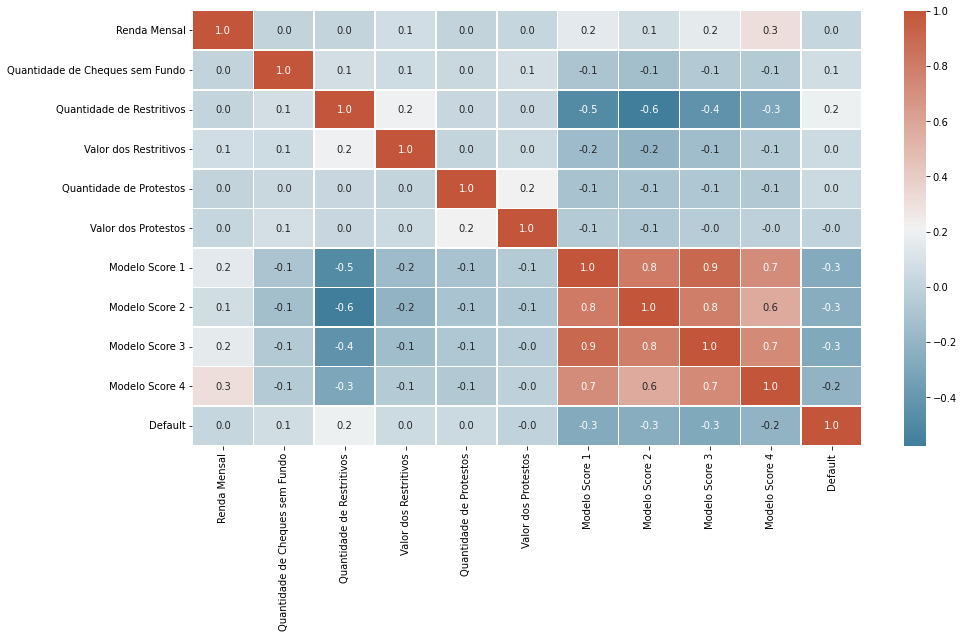

In [ ]:
# Matriz de Correlação pela variável target

fig = plt.subplots(figsize=(15,8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
correlation = data_90D12M[var_numericas2].corr()
corrplot = sns.heatmap(correlation,cmap=cmap,annot=True, fmt='.1f', linewidths=.6)

In [ ]:
# Transformando as variáveis qualitativas em valores numéricos
data_30D3M = pd.get_dummies(data_30D3M, dtype=('int64'), drop_first=True)
data_60D6M = pd.get_dummies(data_60D6M, dtype=('int64'), drop_first=True)
data_60D9M = pd.get_dummies(data_60D9M, dtype=('int64'), drop_first=True)
data_90D9M = pd.get_dummies(data_90D9M, dtype=('int64'), drop_first=True)
data_90D12M = pd.get_dummies(data_90D12M, dtype=('int64'), drop_first=True)

# **4 - ANÁLISE E MODELAGEM**

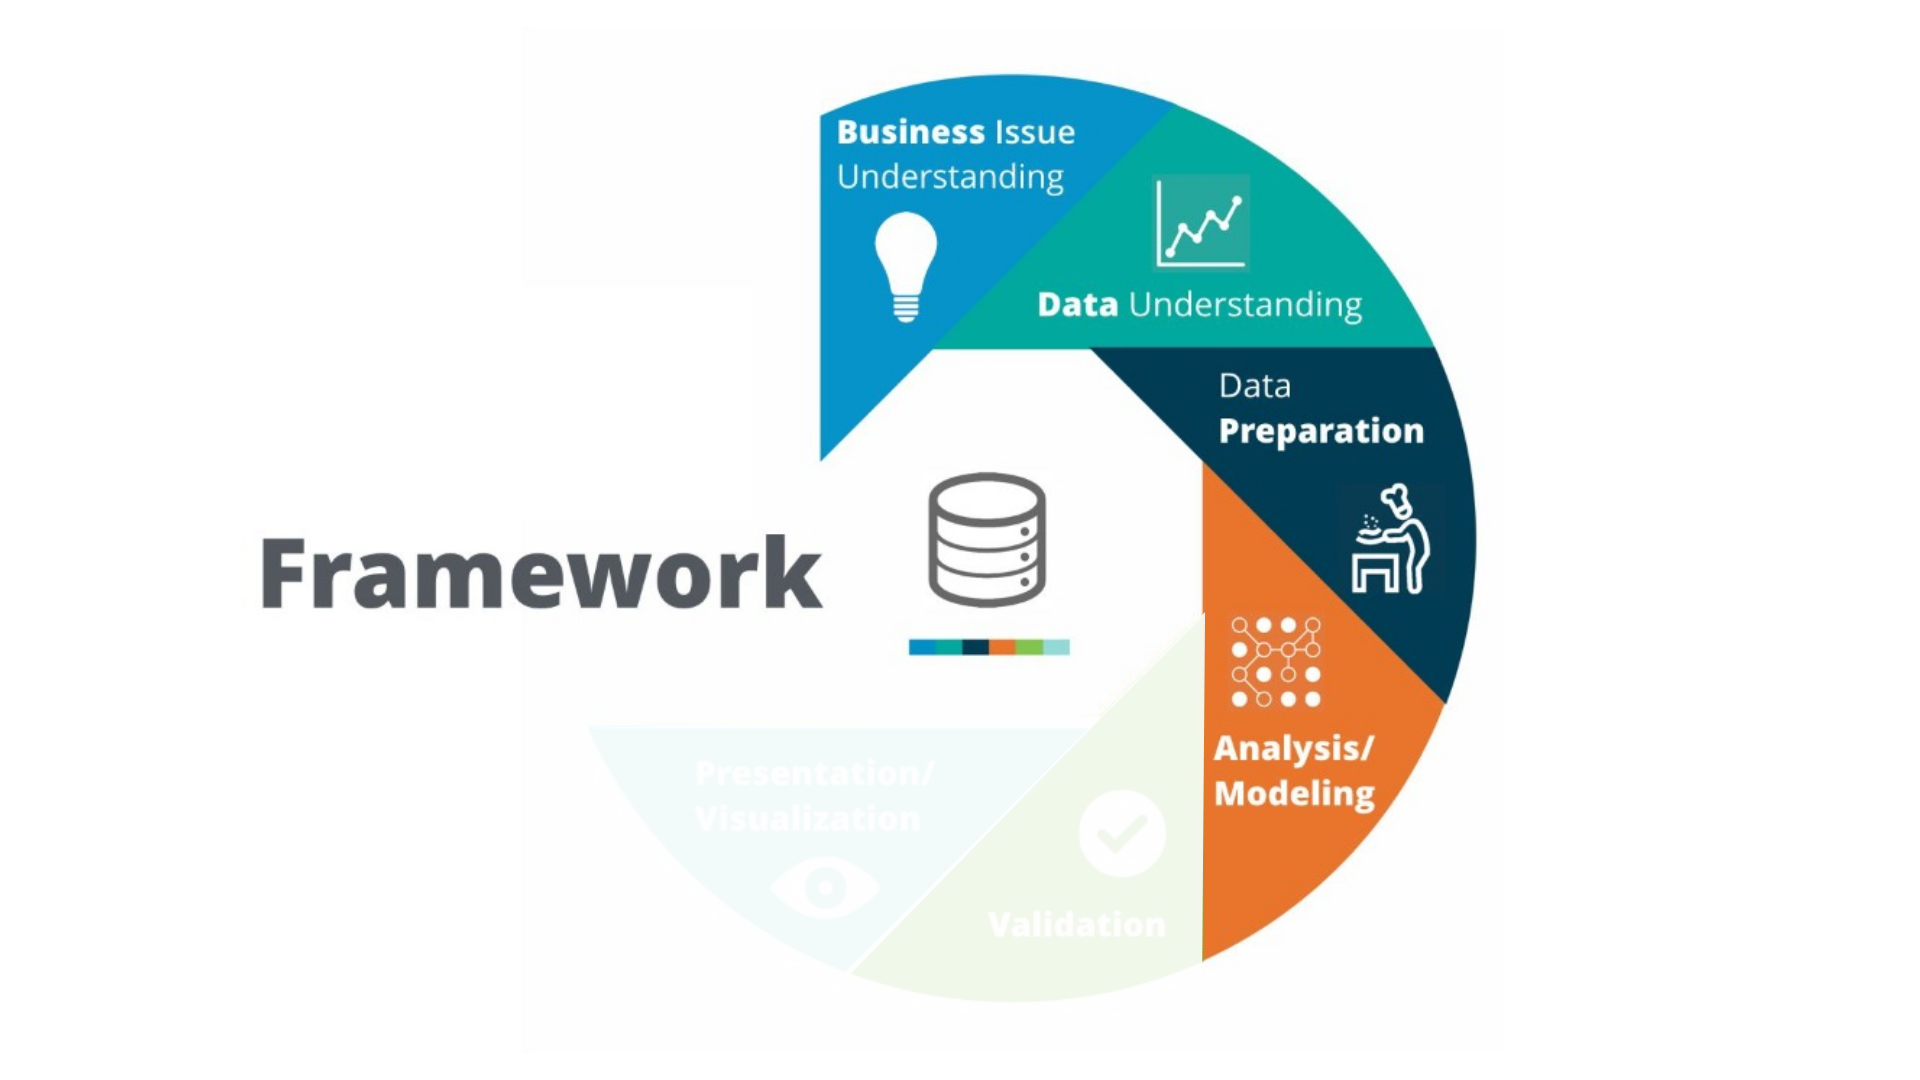

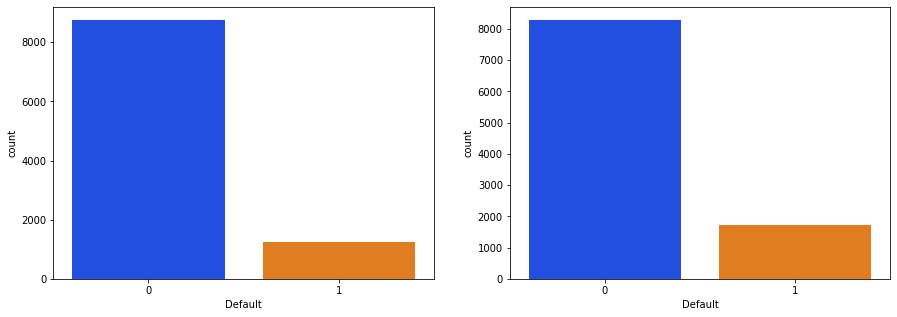

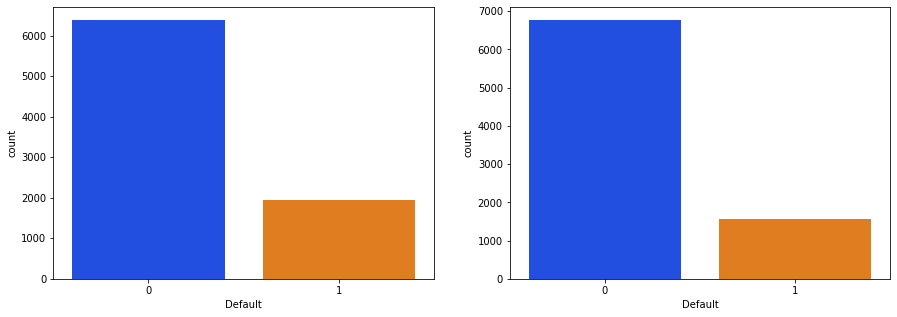

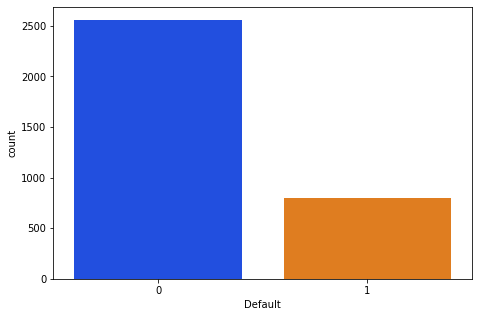

In [ ]:
#Checagem do balanceamento das variáveis target
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig, (ax3, ax4) = plt.subplots(1,2, figsize=(15,5))
fig, (ax5) = plt.subplots(1,1, figsize=(7.5,5))

sns.countplot(x=data_30D3M ['Default'], ax=ax1,palette='bright',)
sns.countplot(x=data_60D6M ['Default'], ax=ax2, palette='bright')
sns.countplot(x=data_60D9M ['Default'], ax=ax3, palette='bright')
sns.countplot(x=data_90D9M ['Default'], ax=ax4, palette='bright')
sns.countplot(x=data_90D12M ['Default'], ax=ax5, palette='bright')

In [ ]:
# Contagem de frequencia
data_30D3M['Default'].value_counts()

0    8755
1    1244
Name: Default, dtype: int64

In [ ]:
# Balanceando as váriáveis target
# data_30D3M
maioria = data_30D3M[data_30D3M['Default']==0]
minoria = data_30D3M[data_30D3M['Default']==1]

minoria_balanceada = resample(minoria, replace=True, n_samples=8755)
data_30D3M_balanceado = pd.concat([maioria, minoria_balanceada])

data_30D3M_balanceado['Default'].value_counts()

1    8755
0    8755
Name: Default, dtype: int64

In [ ]:
# Contagem de frequencia
data_60D6M['Default'].value_counts()

0    8290
1    1709
Name: Default, dtype: int64

In [ ]:
# Balanceando as váriáveis target
# data_60D6M
maioria = data_60D6M[data_60D6M['Default']==0]
minoria = data_60D6M[data_60D6M['Default']==1]

minoria_balanceada = resample(minoria, replace=True, n_samples=8290)
data_60D6M_balanceado = pd.concat([maioria, minoria_balanceada])

data_60D6M_balanceado['Default'].value_counts()

1    8290
0    8290
Name: Default, dtype: int64

In [ ]:
# Contagem de frequencia
data_60D9M['Default'].value_counts()

0    6390
1    1944
Name: Default, dtype: int64

In [ ]:
# Balanceando as váriáveis target
# data_60D9M
maioria = data_60D9M[data_60D9M['Default']==0]
minoria = data_60D9M[data_60D9M['Default']==1]

minoria_balanceada = resample(minoria, replace=True, n_samples=6390)
data_60D9M_balanceado = pd.concat([maioria, minoria_balanceada])

data_60D9M_balanceado['Default'].value_counts()

1    6390
0    6390
Name: Default, dtype: int64

In [ ]:
# Contagem de frequencia
data_90D9M['Default'].value_counts()

0    6770
1    1564
Name: Default, dtype: int64

In [ ]:
# Balanceando as váriáveis target
# data_90D9M
maioria = data_90D9M[data_90D9M['Default']==0]
minoria = data_90D9M[data_90D9M['Default']==1]

minoria_balanceada = resample(minoria, replace=True, n_samples=6770)
data_90D9M_balanceado = pd.concat([maioria, minoria_balanceada])

data_90D9M_balanceado['Default'].value_counts()

1    6770
0    6770
Name: Default, dtype: int64

In [ ]:
# Contagem de frequencia
data_90D12M['Default'].value_counts()

0    2558
1     796
Name: Default, dtype: int64

In [ ]:
# Balanceando as váriáveis target
# data_90D12M
maioria = data_90D12M[data_90D12M['Default']==0]
minoria = data_90D12M[data_90D12M['Default']==1]

minoria_balanceada = resample(minoria, replace=True, n_samples=2558)
data_90D12M_balanceado = pd.concat([maioria, minoria_balanceada])

data_90D12M_balanceado['Default'].value_counts()

1    2558
0    2558
Name: Default, dtype: int64

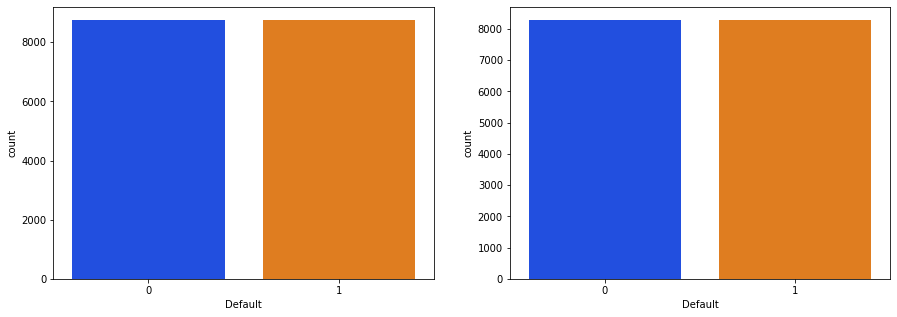

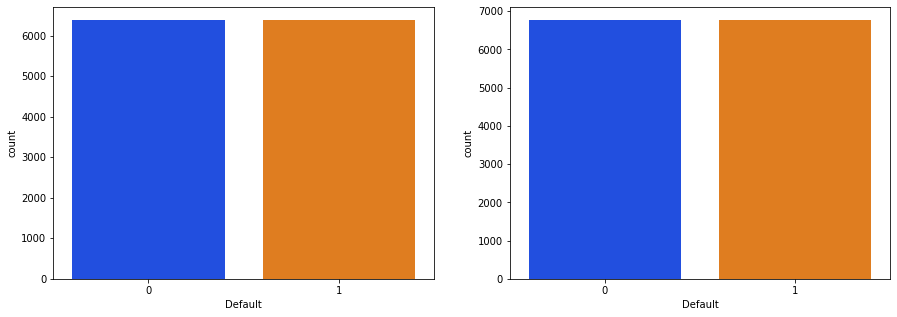

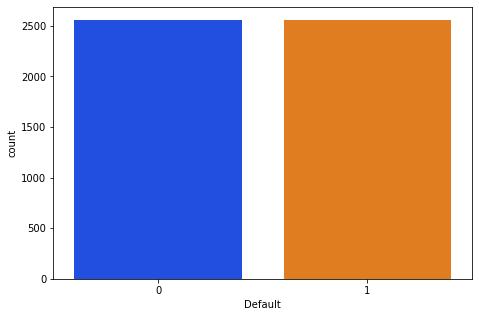

In [ ]:
#Checagem do balanceamento das variáveis target
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
fig, (ax3, ax4) = plt.subplots(1,2, figsize=(15,5))
fig, (ax5) = plt.subplots(1,1, figsize=(7.5,5))

sns.countplot(x=data_30D3M_balanceado['Default'], ax=ax1,palette='bright')
sns.countplot(x=data_60D6M_balanceado['Default'], ax=ax2, palette='bright')
sns.countplot(x=data_60D9M_balanceado['Default'], ax=ax3, palette='bright')
sns.countplot(x=data_90D9M_balanceado['Default'], ax=ax4, palette='bright')
sns.countplot(x=data_90D12M_balanceado['Default'], ax=ax5, palette='bright')

In [ ]:
# Divisão dos dados de Treino e Teste
# data_30D3M_balanceado
X_30D3M = data_30D3M_balanceado.drop('Default', axis=1)
y_30D3M = data_30D3M_balanceado['Default']

X_30D3M_treino,X_30D3M_teste, y_30D3M_treino, y_30D3M_teste = train_test_split(X_30D3M, y_30D3M) 

scaler = StandardScaler()
scaler.fit(X_30D3M_treino)
X_30D3M_treino = scaler.transform(X_30D3M_treino)
X_30D3M_teste = scaler.transform(X_30D3M_teste)

In [ ]:
# Divisão dos dados de Treino e Teste
# data_60D6M_balanceado
X_60D6M = data_60D6M_balanceado.drop('Default', axis=1)
y_60D6M = data_60D6M_balanceado['Default']

X_60D6M_treino,X_60D6M_teste, y_60D6M_treino, y_60D6M_teste = train_test_split(X_60D6M, y_60D6M) 

scaler = StandardScaler()
scaler.fit(X_60D6M_treino)
X_60D6M_treino = scaler.transform(X_60D6M_treino)
X_60D6M_teste = scaler.transform(X_60D6M_teste)

In [ ]:
# Divisão dos dados de Treino e Teste
# data_60D9M_balanceado
X_60D9M = data_60D9M_balanceado.drop('Default', axis=1)
y_60D9M = data_60D9M_balanceado['Default']

X_60D9M_treino,X_60D9M_teste, y_60D9M_treino, y_60D9M_teste = train_test_split(X_60D9M, y_60D9M) 

scaler = StandardScaler()
scaler.fit(X_60D9M_treino)
X_60D9M_treino = scaler.transform(X_60D9M_treino)
X_60D9M_teste = scaler.transform(X_60D9M_teste)

In [ ]:
# Divisão dos dados de Treino e Teste
# data_90D9M_balanceado
X_90D9M = data_90D9M_balanceado.drop('Default', axis=1)
y_90D9M = data_90D9M_balanceado['Default']

X_90D9M_treino,X_90D9M_teste, y_90D9M_treino, y_90D9M_teste = train_test_split(X_90D9M, y_90D9M) 

scaler = StandardScaler()
scaler.fit(X_90D9M_treino)
X_90D9M_treino = scaler.transform(X_90D9M_treino)
X_90D9M_teste = scaler.transform(X_90D9M_teste)

In [ ]:
# Divisão dos dados de Treino e Teste
# data_90D12M_balanceado
X_90D12M = data_90D12M_balanceado.drop('Default', axis=1)
y_90D12M = data_90D12M_balanceado['Default']

X_90D12M_treino,X_90D12M_teste, y_90D12M_treino, y_90D12M_teste = train_test_split(X_90D12M, y_90D12M) 

scaler = StandardScaler()
scaler.fit(X_90D12M_treino)
X_90D12M_treino = scaler.transform(X_90D12M_treino)
X_90D12M_teste = scaler.transform(X_90D12M_teste)

# **5 - VALIDAÇÃO DO MODELO**


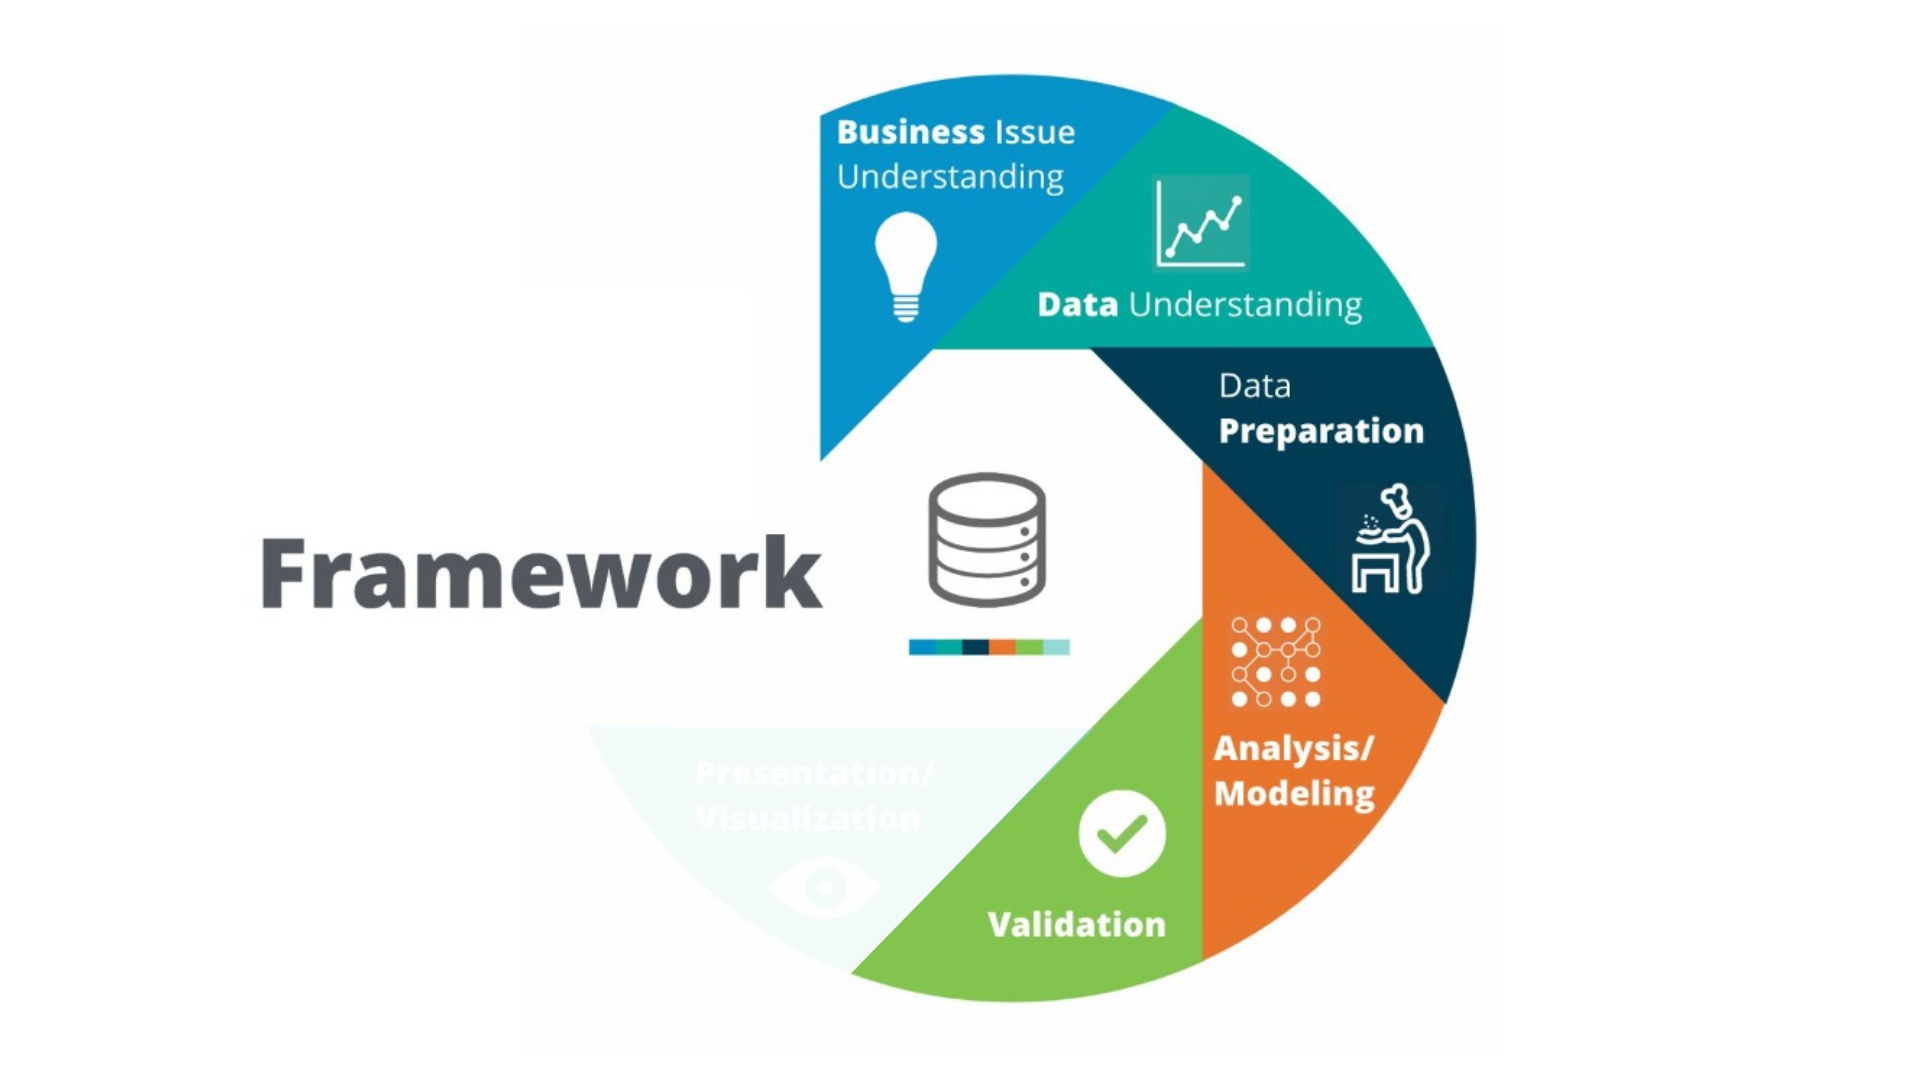

Serão usados 4 modelos para cada dataset, totalizando 20 modelos que ao final será escolhido o melhor para cada Performance

Algoritmos para treinar modelos:

*   Regressão Logística
*   Árvores de Decisão
*   Random Forest
*   XGBoost

Como métricas serão a Acurácia, Precisão, Recall, Área sob a Curva ROC

## TREINO 

In [ ]:
# data_30D3M_banlaceado
#Criando os modelos juntamente com as métricas

#Regressão logística
logreg = cross_validate(LogisticRegression(solver='liblinear'), X_30D3M_treino, y_30D3M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#Arvóres de decisão
trees = cross_validate(DecisionTreeClassifier(), X_30D3M_treino, y_30D3M_treino, cv=5, 
                       scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# Random Forest
forest = cross_validate(RandomForestClassifier(), X_30D3M_treino, y_30D3M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#XGBoost
xgb = cross_validate(XGBClassifier(), X_30D3M_treino, y_30D3M_treino, cv=5, 
                     scoring=['accuracy', 'precision', 'recall', 'roc_auc'])



In [ ]:
# data_60D6M_banlaceado
#Criando os modelos juntamente com as métricas

#Regressão logística
logreg2 = cross_validate(LogisticRegression(solver='liblinear'), X_60D6M_treino, y_60D6M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#Arvóres de decisão
trees2 = cross_validate(DecisionTreeClassifier(), X_60D6M_treino, y_60D6M_treino, cv=5, 
                       scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# Random Forest
forest2 = cross_validate(RandomForestClassifier(), X_60D6M_treino, y_60D6M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#XGBoost
xgb2 = cross_validate(XGBClassifier(), X_60D6M_treino, y_60D6M_treino, cv=5, 
                     scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

In [ ]:
# data_60D9M_banlaceado
#Criando os modelos juntamente com as métricas

#Regressão logística
logreg3 = cross_validate(LogisticRegression(solver='liblinear'), X_60D9M_treino, y_60D9M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#Arvóres de decisão
trees3 = cross_validate(DecisionTreeClassifier(), X_60D9M_treino, y_60D9M_treino, cv=5, 
                       scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# Random Forest
forest3 = cross_validate(RandomForestClassifier(), X_60D9M_treino, y_60D9M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#XGBoost
xgb3 = cross_validate(XGBClassifier(), X_60D9M_treino, y_60D9M_treino, cv=5, 
                     scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

In [ ]:
# data_90D9M_banlaceado
#Criando os modelos juntamente com as métricas

#Regressão logística
logreg4 = cross_validate(LogisticRegression(solver='liblinear'), X_90D9M_treino, y_90D9M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#Arvóres de decisão
trees4 = cross_validate(DecisionTreeClassifier(), X_90D9M_treino, y_90D9M_treino, cv=5, 
                       scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# Random Forest
forest4 = cross_validate(RandomForestClassifier(), X_90D9M_treino, y_90D9M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#XGBoost
xgb4 = cross_validate(XGBClassifier(), X_90D9M_treino, y_90D9M_treino, cv=5, 
                     scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

In [ ]:
# data_90D12M_banlaceado
#Criando os modelos juntamente com as métricas

#Regressão logística
logreg5 = cross_validate(LogisticRegression(solver='liblinear'), X_90D12M_treino, y_90D12M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#Arvóres de decisão
trees5 = cross_validate(DecisionTreeClassifier(), X_90D12M_treino, y_90D12M_treino, cv=5, 
                       scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# Random Forest
forest5 = cross_validate(RandomForestClassifier(), X_90D12M_treino, y_90D12M_treino, cv=5, 
                        scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

#XGBoost
xgb5 = cross_validate(XGBClassifier(), X_90D12M_treino, y_90D12M_treino, cv=5, 
                     scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# **6 - RESULTADOS**

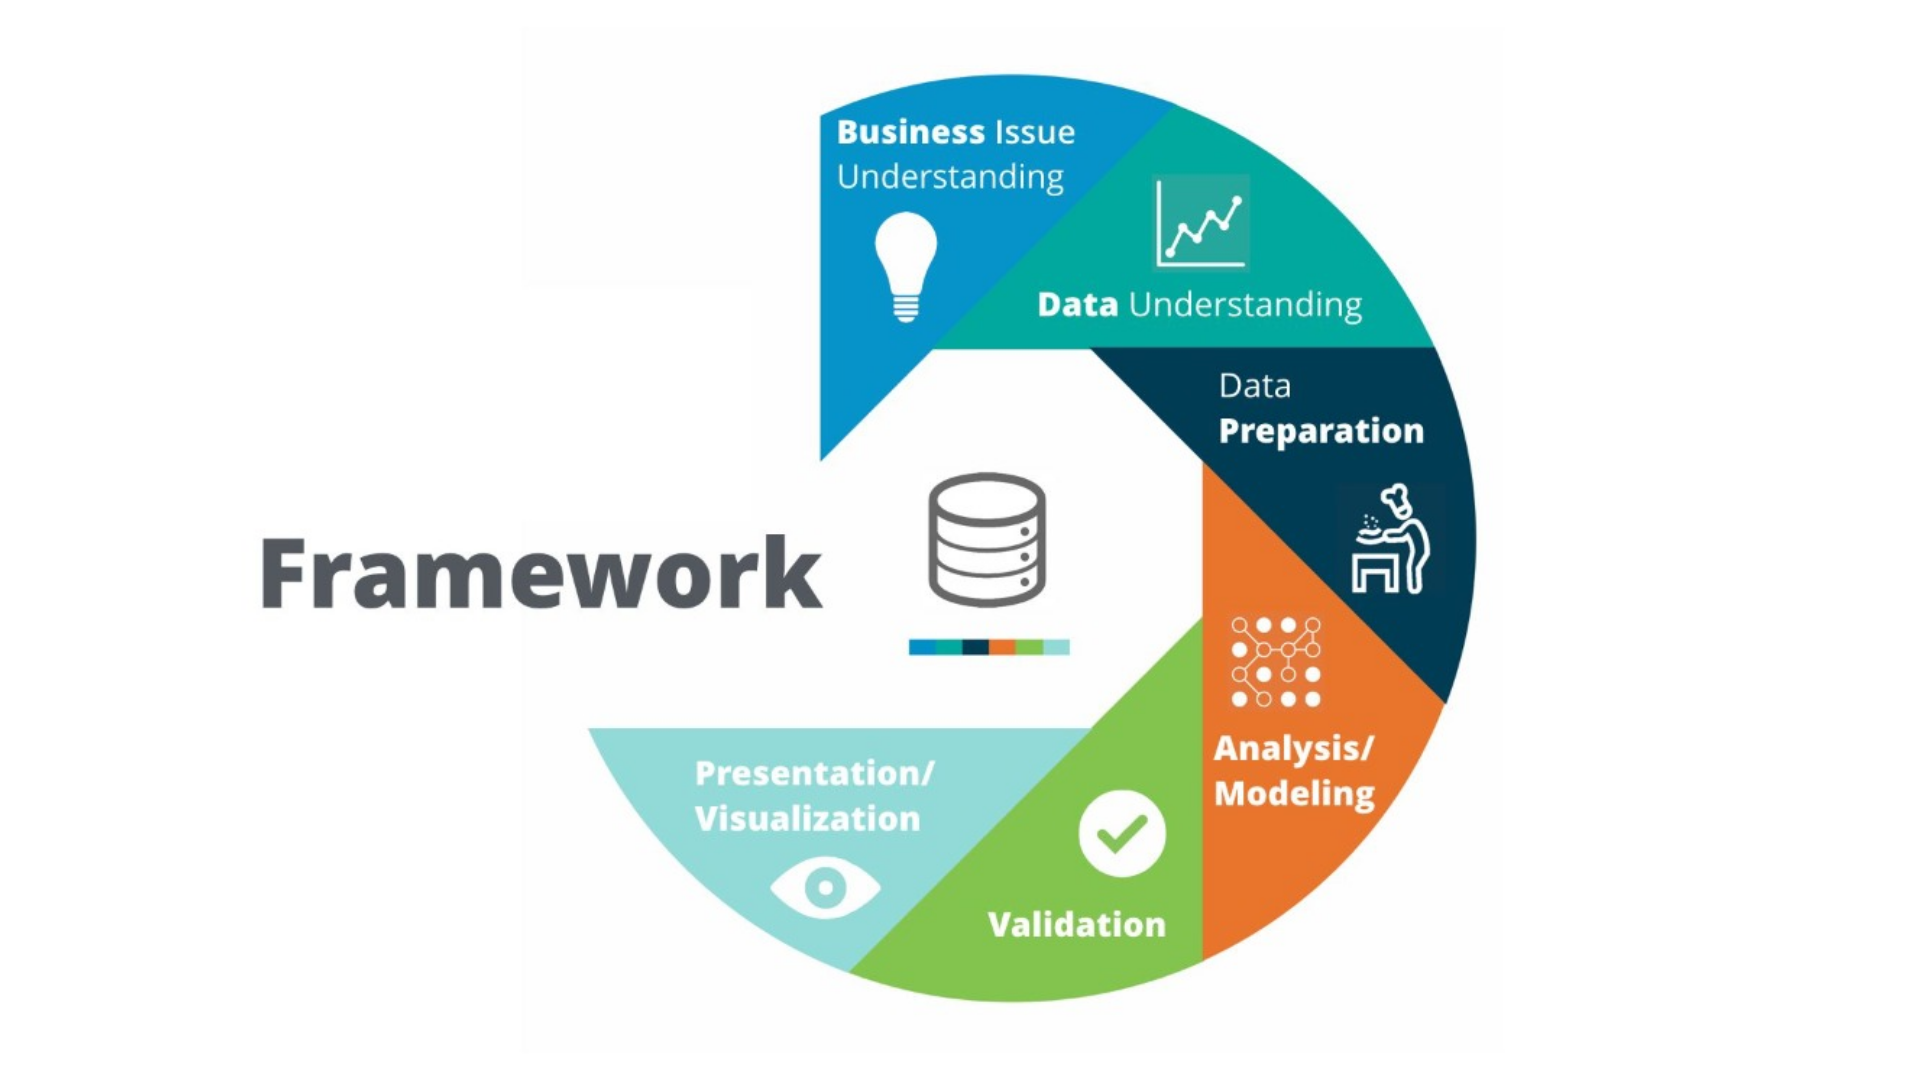

In [ ]:
# Tabela de resultados das métricas
# data_30D3M_balanceado
summary = pd.DataFrame({
    'labels': ['Acurácia', 'Precisão', 'Recall', 'ROC'],
    'logreg': [logreg['test_accuracy'].mean(), logreg['test_precision'].mean(), logreg['test_recall'].mean(), logreg['test_roc_auc'].mean()],
    'trees': [trees['test_accuracy'].mean(), trees['test_precision'].mean(), trees['test_recall'].mean(), trees['test_roc_auc'].mean()],
    'forest': [forest['test_accuracy'].mean(), forest['test_precision'].mean(), forest['test_recall'].mean(), forest['test_roc_auc'].mean()],
    'xgb': [xgb['test_accuracy'].mean(), xgb['test_precision'].mean(), xgb['test_recall'].mean(), xgb['test_roc_auc'].mean()]   
                      }).set_index('labels')
                      

summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: red' if x >= 0.9 else '')


In [ ]:
# Tabela de resultados das métricas
# data_60D6M_balanceado
summary = pd.DataFrame({
    'labels': ['Acurácia', 'Precisão', 'Recall', 'ROC'],
    'logreg': [logreg2['test_accuracy'].mean(), logreg2['test_precision'].mean(), logreg2['test_recall'].mean(), logreg2['test_roc_auc'].mean()],
    'trees': [trees2['test_accuracy'].mean(), trees2['test_precision'].mean(), trees2['test_recall'].mean(), trees2['test_roc_auc'].mean()],
    'forest': [forest2['test_accuracy'].mean(), forest2['test_precision'].mean(), forest2['test_recall'].mean(), forest2['test_roc_auc'].mean()],
    'xgb': [xgb2['test_accuracy'].mean(), xgb2['test_precision'].mean(), xgb2['test_recall'].mean(), xgb2['test_roc_auc'].mean()]   
                      }).set_index('labels')
                      

summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: red' if x >= 0.9 else '')

In [ ]:
# Tabela de resultados das métricas
# data_60D9M_balanceado
summary = pd.DataFrame({
    'labels': ['Acurácia', 'Precisão', 'Recall', 'ROC'],
    'logreg': [logreg3['test_accuracy'].mean(), logreg3['test_precision'].mean(), logreg3['test_recall'].mean(), logreg3['test_roc_auc'].mean()],
    'trees': [trees3['test_accuracy'].mean(), trees3['test_precision'].mean(), trees3['test_recall'].mean(), trees3['test_roc_auc'].mean()],
    'forest': [forest3['test_accuracy'].mean(), forest3['test_precision'].mean(), forest3['test_recall'].mean(), forest3['test_roc_auc'].mean()],
    'xgb': [xgb3['test_accuracy'].mean(), xgb3['test_precision'].mean(), xgb3['test_recall'].mean(), xgb3['test_roc_auc'].mean()]   
                      }).set_index('labels')
                      

summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: red' if x >= 0.9 else '')

In [ ]:
# Tabela de resultados das métricas
# data_90D9M_balanceado
summary = pd.DataFrame({
    'labels': ['Acurácia', 'Precisão', 'Recall', 'ROC'],
    'logreg': [logreg4['test_accuracy'].mean(), logreg4['test_precision'].mean(), logreg4['test_recall'].mean(), logreg4['test_roc_auc'].mean()],
    'trees': [trees4['test_accuracy'].mean(), trees4['test_precision'].mean(), trees4['test_recall'].mean(), trees4['test_roc_auc'].mean()],
    'forest': [forest4['test_accuracy'].mean(), forest4['test_precision'].mean(), forest4['test_recall'].mean(), forest4['test_roc_auc'].mean()],
    'xgb': [xgb4['test_accuracy'].mean(), xgb4['test_precision'].mean(), xgb4['test_recall'].mean(), xgb4['test_roc_auc'].mean()]   
                      }).set_index('labels')
                      

summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: red' if x >= 0.9 else '')

In [ ]:
# Tabela de resultados das métricas
# data_90D12M_balanceado
summary = pd.DataFrame({
    'labels': ['Acurácia', 'Precisão', 'Recall', 'ROC'],
    'logreg': [logreg5['test_accuracy'].mean(), logreg5['test_precision'].mean(), logreg5['test_recall'].mean(), logreg5['test_roc_auc'].mean()],
    'trees': [trees5['test_accuracy'].mean(), trees5['test_precision'].mean(), trees5['test_recall'].mean(), trees5['test_roc_auc'].mean()],
    'forest': [forest5['test_accuracy'].mean(), forest5['test_precision'].mean(), forest5['test_recall'].mean(), forest5['test_roc_auc'].mean()],
    'xgb': [xgb5['test_accuracy'].mean(), xgb5['test_precision'].mean(), xgb5['test_recall'].mean(), xgb5['test_roc_auc'].mean()]   
                      }).set_index('labels')
                      

summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: red' if x >= 0.9 else '')

## Ajuste fino dos Hiperparâmetros 
Grid Search para escolher o melhor valor para os seguintes hiperparâmetros:
* criterion - decide qual variável escolher para os nós
* n_estimators - nº de árvores antes da votação
* max_depth - Profundidade da árvore
* min_samples_split- nº minimo de amostras para dividir o nó
* min_samples_leaf - nº minimo de amostras nas folhas


### PERFORMANCE 30D3M

In [ ]:
# Modelo escolhido data_30D30M_balanceado
# Random Forest

# Criterion

kfold = StratifiedKFold(n_splits=5, shuffle=True)

forest = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy']}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_30D3M_treino, y_30D3M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9961791101006019 para {'criterion': 'gini'}


In [ ]:
# n_estimators
forest = RandomForestClassifier(criterion='gini')

param_grid = {'n_estimators': range(50, 500, 50)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_30D3M_treino, y_30D3M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9970821240990073 para {'n_estimators': 400}


In [ ]:
# max_depth
forest = RandomForestClassifier(criterion='gini', n_estimators=400)

param_grid = {'max_depth': range(1, 10)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_30D3M_treino, y_30D3M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.8571066794262286 para {'max_depth': 9}


In [ ]:
# min_samples_split
forest = RandomForestClassifier(criterion='gini', n_estimators=400, max_depth=9)

param_grid = {'min_samples_split': range(2, 10, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_30D3M_treino, y_30D3M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.8579643528591372 para {'min_samples_split': 2}


In [ ]:
# min_samples_leaf
forest = RandomForestClassifier(criterion='gini', n_estimators=400, max_depth=9, min_samples_split=2)

param_grid = {'min_samples_leaf': range(1, 6, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_30D3M_treino, y_30D3M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.8564522273251036 para {'min_samples_leaf': 1}


### PERFORMANCE 60D6M

In [ ]:
# Modelo escolhido data_60D6M_balanceado
# Random Forest

# Criterion

kfold = StratifiedKFold(n_splits=5, shuffle=True)

forest2 = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy']}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D6M_treino, y_60D6M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9850516957720876 para {'criterion': 'gini'}


In [ ]:
# n_estimators
forest2 = RandomForestClassifier(criterion='gini')

param_grid = {'n_estimators': range(50, 500, 50)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D6M_treino, y_60D6M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9863696280345738 para {'n_estimators': 250}


In [ ]:
# max_depth
forest2 = RandomForestClassifier(criterion='gini', n_estimators=250)

param_grid = {'max_depth': range(1, 10)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D6M_treino, y_60D6M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.8227780438415389 para {'max_depth': 9}


In [ ]:
# min_samples_split
forest2 = RandomForestClassifier(criterion='gini', n_estimators=250)

param_grid = {'min_samples_split': range(2, 10, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D6M_treino, y_60D6M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9820145390937702 para {'min_samples_split': 2}


In [ ]:
# min_samples_leaf
forest2 = RandomForestClassifier(criterion='gini', n_estimators=250, min_samples_split=2)

param_grid = {'min_samples_leaf': range(1, 6, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D6M_treino, y_60D6M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.984320906922372 para {'min_samples_leaf': 1}


### PERFORMANCE 60D9M

In [ ]:
# Modelo escolhido data_60D9M_balanceado
# Random Forest

# Criterion

kfold = StratifiedKFold(n_splits=5, shuffle=True)

forest3 = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy']}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D9M_treino, y_60D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.95808960250023 para {'criterion': 'gini'}


In [ ]:
# n_estimators
forest3 = RandomForestClassifier(criterion='gini')

param_grid = {'n_estimators': range(50, 500, 50)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D9M_treino, y_60D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9575905408026889 para {'n_estimators': 450}


In [ ]:
# max_depth
forest3 = RandomForestClassifier(criterion='gini', n_estimators=450)

param_grid = {'max_depth': range(1, 10)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D9M_treino, y_60D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.8093175371410174 para {'max_depth': 9}


In [ ]:
# min_samples_split
forest3 = RandomForestClassifier(criterion='gini', n_estimators=450)

param_grid = {'min_samples_split': range(2, 10, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D9M_treino, y_60D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9556704542229711 para {'min_samples_split': 2}


In [ ]:
# min_samples_leaf
forest3 = RandomForestClassifier(criterion='gini', n_estimators=450, min_samples_split=2)

param_grid = {'min_samples_leaf': range(1, 6, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_60D9M_treino, y_60D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9525408687143097 para {'min_samples_leaf': 1}


### PERFORMANCE 90D9M

In [ ]:
# Modelo escolhido data_90D9M_balanceado
# Random Forest

# Criterion

kfold = StratifiedKFold(n_splits=5, shuffle=True)

forest4 = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy']}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D9M_treino, y_90D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9769341351944026 para {'criterion': 'gini'}


In [ ]:
# n_estimators
forest4 = RandomForestClassifier(criterion='gini')

param_grid = {'n_estimators': range(50, 500, 50)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D9M_treino, y_90D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9761676458324109 para {'n_estimators': 400}


In [ ]:
# max_depth
forest4 = RandomForestClassifier(criterion='gini', n_estimators=400)

param_grid = {'max_depth': range(1, 10)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D9M_treino, y_90D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.8216913985625522 para {'max_depth': 9}


In [ ]:
# min_samples_split
forest4 = RandomForestClassifier(criterion='gini', n_estimators=400)

param_grid = {'min_samples_split': range(2, 10, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D9M_treino, y_90D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9772805134685532 para {'min_samples_split': 2}


In [ ]:
# min_samples_leaf
forest4 = RandomForestClassifier(criterion='gini', n_estimators=400, min_samples_split=2)

param_grid = {'min_samples_leaf': range(1, 6, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D9M_treino, y_90D9M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9791069179818443 para {'min_samples_leaf': 1}


### PERFORMANCE 90D12M

In [ ]:
# Modelo escolhido data_90D12M_balanceado
# Random Forest

# Criterion

kfold = StratifiedKFold(n_splits=5, shuffle=True)

forest5 = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy']}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D12M_treino, y_90D12M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9490476563217932 para {'criterion': 'entropy'}


In [ ]:
# n_estimators
forest5 = RandomForestClassifier(criterion='entropy')

param_grid = {'n_estimators': range(50, 500, 50)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D12M_treino, y_90D12M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9845759759011308 para {'n_estimators': 400}


In [ ]:
# max_depth
forest5 = RandomForestClassifier(criterion='entropy', n_estimators=400)

param_grid = {'max_depth': range(1, 10)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D12M_treino, y_90D12M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.832266285307413 para {'max_depth': 9}


In [ ]:
# min_samples_split
forest5 = RandomForestClassifier(criterion='entropy', n_estimators=400)

param_grid = {'min_samples_split': range(2, 10, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D12M_treino, y_90D12M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.9505088091849736 para {'min_samples_split': 2}


In [ ]:
# min_samples_leaf
forest5 = RandomForestClassifier(criterion='entropy', n_estimators=400, min_samples_split=2)

param_grid = {'min_samples_leaf': range(1, 6, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_90D12M_treino, y_90D12M_treino)

print(f'Melhor ajuste: {result.best_score_} para {result.best_params_}')

Melhor ajuste: 0.953407347711433 para {'min_samples_leaf': 1}


##  AVALIAÇÃO COM DADOS DE TESTE DO MODELO COM AJUSTE FINO

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2242
           1       0.96      1.00      0.98      2136

    accuracy                           0.98      4378
   macro avg       0.98      0.98      0.98      4378
weighted avg       0.98      0.98      0.98      4378

ROC_AUC Score: 0.9783121928321089 



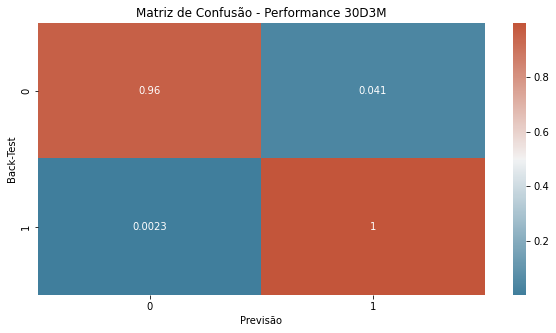

In [ ]:
# Modelo ajustado PERFORMANCE 30D3M
modelo = RandomForestClassifier(criterion='gini', n_estimators=400, min_samples_split=2, min_samples_leaf=1)
# Treino
modelo.fit(X_30D3M_treino, y_30D3M_treino)

# Validação com os dados de teste
y_pred = modelo.predict(X_30D3M_teste)

print(classification_report(y_30D3M_teste, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_30D3M_teste, y_pred)}', '\n')

fig, ax = plt.subplots(figsize=(10,5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(confusion_matrix(y_30D3M_teste, y_pred, normalize='true'), annot=True,cmap=cmap, ax=ax)
ax.set_title('Matriz de Confusão - Performance 30D3M')
ax.set_ylabel('Back-Test')
ax.set_xlabel('Previsão')
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2088
           1       0.91      0.98      0.94      2057

    accuracy                           0.94      4145
   macro avg       0.94      0.94      0.94      4145
weighted avg       0.94      0.94      0.94      4145

ROC_AUC Score: 0.9399680932504093 



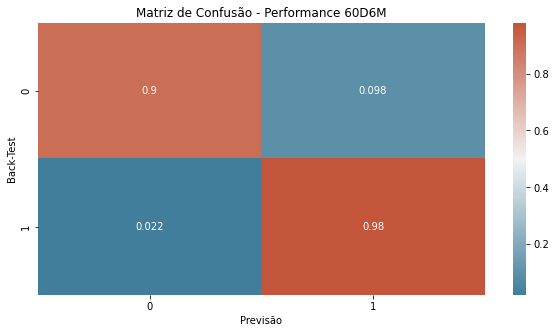

In [ ]:
# Modelo ajustado PERFORMANCE 60D6M
modelo = RandomForestClassifier(criterion='gini', n_estimators=250, min_samples_split=2, min_samples_leaf=1)
# Treino
modelo.fit(X_60D6M_treino, y_60D6M_treino)

# Validação com os dados de teste
y_pred = modelo.predict(X_60D6M_teste)

print(classification_report(y_60D6M_teste, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_60D6M_teste, y_pred)}', '\n')

fig, ax = plt.subplots(figsize=(10,5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(confusion_matrix(y_60D6M_teste, y_pred, normalize='true'), annot=True,cmap=cmap, ax=ax)
ax.set_title('Matriz de Confusão - Performance 60D6M')
ax.set_ylabel('Back-Test')
ax.set_xlabel('Previsão')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1584
           1       0.86      0.95      0.90      1611

    accuracy                           0.90      3195
   macro avg       0.90      0.90      0.90      3195
weighted avg       0.90      0.90      0.90      3195

ROC_AUC Score: 0.898439704305626 



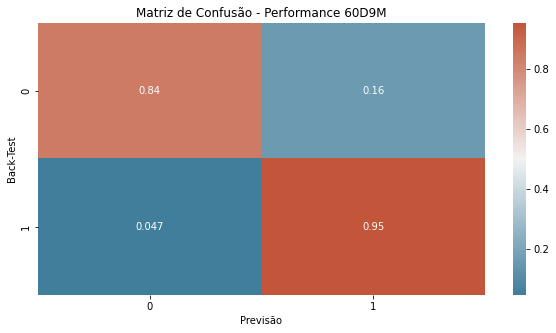

In [ ]:
# Modelo ajustado PERFORMANCE 60D9M
modelo = RandomForestClassifier(criterion='gini', n_estimators=450, min_samples_split=2, min_samples_leaf=1)
# Treino
modelo.fit(X_60D9M_treino, y_60D9M_treino)

# Validação com os dados de teste
y_pred = modelo.predict(X_60D9M_teste)

print(classification_report(y_60D9M_teste, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_60D9M_teste, y_pred)}', '\n')

fig, ax = plt.subplots(figsize=(10,5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(confusion_matrix(y_60D9M_teste, y_pred, normalize='true'), annot=True,cmap=cmap, ax=ax)
ax.set_title('Matriz de Confusão - Performance 60D9M')
ax.set_ylabel('Back-Test')
ax.set_xlabel('Previsão')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1721
           1       0.90      0.97      0.93      1664

    accuracy                           0.93      3385
   macro avg       0.94      0.93      0.93      3385
weighted avg       0.94      0.93      0.93      3385

ROC_AUC Score: 0.933311601875028 



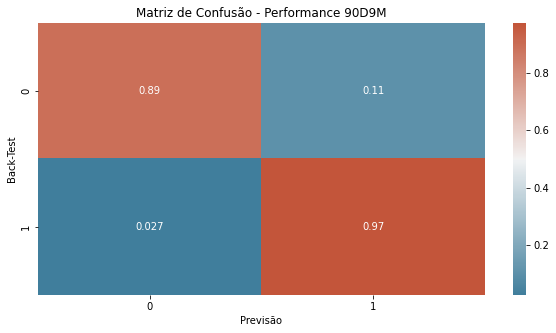

In [ ]:
# Modelo ajustado PERFORMANCE 90D9M
modelo = RandomForestClassifier(criterion='gini', n_estimators=400, min_samples_split=2, min_samples_leaf=1)
# Treino
modelo.fit(X_90D9M_treino, y_90D9M_treino)

# Validação com os dados de teste
y_pred = modelo.predict(X_90D9M_teste)

print(classification_report(y_90D9M_teste, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_90D9M_teste, y_pred)}', '\n')

fig, ax = plt.subplots(figsize=(10,5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(confusion_matrix(y_90D9M_teste, y_pred, normalize='true'), annot=True,cmap=cmap, ax=ax)
ax.set_title('Matriz de Confusão - Performance 90D9M')
ax.set_ylabel('Back-Test')
ax.set_xlabel('Previsão')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       619
           1       0.87      0.96      0.91       660

    accuracy                           0.90      1279
   macro avg       0.91      0.90      0.90      1279
weighted avg       0.91      0.90      0.90      1279

ROC_AUC Score: 0.9011932736084594 



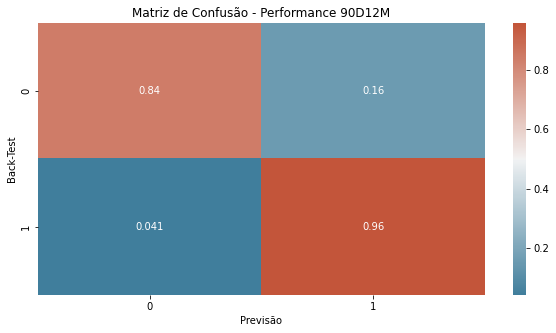

In [ ]:
# Modelo ajustado PERFORMANCE 90D12M
modelo = RandomForestClassifier(criterion='entropy', n_estimators=400, min_samples_split=2, min_samples_leaf=1)
# Treino
modelo.fit(X_90D12M_treino, y_90D12M_treino)

# Validação com os dados de teste
y_pred = modelo.predict(X_90D12M_teste)

print(classification_report(y_90D12M_teste, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_90D12M_teste, y_pred)}', '\n')

fig, ax = plt.subplots(figsize=(10,5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(confusion_matrix(y_90D12M_teste, y_pred, normalize='true'), annot=True,cmap=cmap, ax=ax)
ax.set_title('Matriz de Confusão - Performance 90D12M')
ax.set_ylabel('Back-Test')
ax.set_xlabel('Previsão')
plt.show()

# 7 - **MODELOS ESCOLHIDOS**

FORAM ESCOLHIDOS OS SEGUINTES MODELOS PARA CADA TIPO DE PERFORMANCE

* Perfomance 30D3M - Random Forest - ROC_AUC Score: 0.9773002810485131 
* Perfomance 60D6M - Random Forest - ROC_AUC Score: 0.9409403829927525 
* Perfomance 60D9M - Random Forest - ROC_AUC Score: 0.898439704305626
* Perfomance 90D9M - Random Forest - ROC_AUC Score: 0.933311601875028 
* Perfomance 90D12M - Random Forest - ROC_AUC Score: 0.9011932736084594 
